In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Arshad/21833430" -d "/content/AdultVocalizations"

Archive:  /content/drive/MyDrive/Arshad/21833430
  inflating: /content/AdultVocalizations/BlaBla0506_110302-AggC-04.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-AggC-05.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-01.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-02.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-05.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-06.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-08.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-10.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-11.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-12.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-13.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-14.wav  
  inflating: /content/AdultVocalizations/BlaBla0506_110302-DC-15.wav  
  inflating: /content/Ad

In [3]:
import os
#dataset_path = "/content/AdultVocalizations" # Run this for Colab
#dataset_path = "/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/AdultVocalizations" # Run this for local
dataset_path = "/content/AdultVocalizations"
list_of_calls = os.listdir(dataset_path)
len(list_of_calls) # 2969 is the number of adult calls we have

FileNotFoundError: [Errno 2] No such file or directory: '/content/AdultVocalizations'

In [1]:
#counter= 0
calls_dict = {'Ag':0,
              'Be':0,   
              'DC':0,
              'Di':0,
              'LT':0,
              'Ne':0,
              'So':0,
              'Te':0,
              'Th':0,
              'Tu':0,
              'Wh':0}

for call in list_of_calls:
  if call.endswith(".wav"):
    index = call.find("-")
    for key in calls_dict.keys():
      if call[index+1:index+3]== key:
        calls_dict[key] +=1
      #else:
        # Find which files have problems with notations
        #counter +=1
        #print(call)


calls_dict

NameError: name 'list_of_calls' is not defined

In [ ]:
sum(list(calls_dict.values())) # 41 data is lost here.
# in the next step we retrieve them.

2928

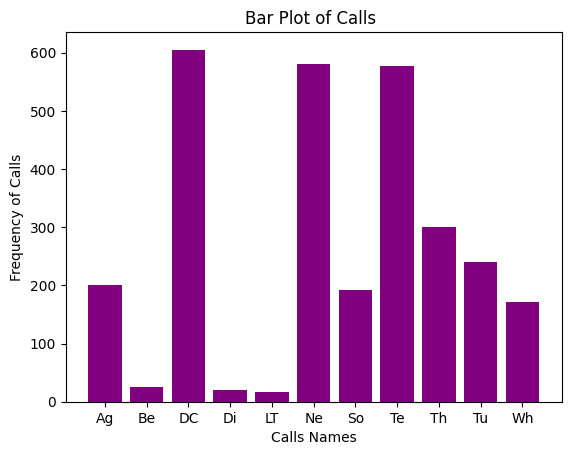

In [ ]:
import matplotlib.pyplot as plt

# Separate keys and values
keys = list(calls_dict.keys())
values = list(calls_dict.values())
# Create the figure and axis
fig, ax = plt.subplots()

# Create the bar plot
ax.bar(keys, values, color='purple')

# Set title and labels
ax.set_title('Bar Plot of Calls ')
ax.set_xlabel('Calls Names')
ax.set_ylabel('Frequency of Calls')

# Show the plot
plt.show()

Based on the Bar plot Data Augmentation is needed.

In [401]:
def label_finder(file_name):
  """
    This function extracts a label from the given file name based on a predefined dictionary of labels.

    Args:
        file_name (str): The name of the file, expected to end with '.wav'.

    Returns:
        int: The label corresponding to the key found in the file name.
        None: If an error occurs during processing.

    The function uses a dictionary `calls_label_dict` where keys are specific codes (e.g., 'Ag', 'Be')
    and values are corresponding integer labels. It checks if the file name ends with ".wav" and
    then looks for a specific pattern in the file name (two characters following a hyphen). If
    a match is found in the dictionary, the corresponding label is returned. If an exception occurs,
    it prints an error message and returns None.
  """
  calls_label_dict = {'Ag':0,
                      'Be':1,
                      'DC':2,
                      'Di':3,
                      'LT':4,
                      'Ne':5,
                      'So':6,
                      'Te':7,
                      'Th':8,
                      'Tu':9,
                      'Wh':10}

  try:
    if file_name.endswith(".wav"):
      index = file_name.find("-")
      for key in calls_label_dict.keys():
        if file_name[index+1:index+3]== key:
          label = calls_label_dict[key]
          return label
  except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None

out = label_finder("LblRed0613_111202-DC-33.wav")
out

2

In [ ]:
CNN_flag = True
Spectrogram_shape = []
def create_feature_label_vectores(dataset_path):
    """
    Create feature and label vectors from audio files.

    Parameters:
    - list_of_calls: list of call names corresponding to the audio files
    - dataset_path: base path where audio files are stored
    - calls_label_dict: dictionary mapping call names to label integers

    Returns:
    - features: numpy array of features
    - labels: numpy array of labels
    """
    features = []
    labels = []
    for call in list_of_calls:
        label = label_finder(call)
        if label is not None:
            joined_path =os.path.join(dataset_path, call)
            stft_matrix = calculate_stft(joined_path)
            if stft_matrix is not None:
                stft_matrix = calculate_spectrogram(stft_matrix)
                if CNN_flag: # make images out of spectrograms
                    stft_matrix = np.expand_dims(stft_matrix, axis=-1)
                if stft_matrix is not None:
                    features.append(stft_matrix)
                    labels.append(label)

    return features ,labels


calls_label_dict = {'Ag':0,
                    'Be':1,
                    'DC':2,
                    'Di':3,
                    'LT':4,
                    'Ne':5,
                    'So':6,
                    'Te':7,
                    'Th':8,
                    'Tu':9,
                    'Wh':10}

list_of_calls = os.listdir(dataset_path)
features, labels = create_feature_label_vectores(dataset_path)


## Flattening Spectrograms
After Feature extraction(using STFT) features looked like this:

(1025, 6, 1)//
(1025, 9, 1)//
(1025, 11, 1)//
(1025, 5, 1)//
(1025, 4, 1)//
(1025, 2, 1)//
(1025, 5, 1)//
(1025, 5, 1)//
(1025, 5, 1)//

Thus, I merged/flattened the 2first dimensions.

In [ ]:
len(list_of_calls)

In [ ]:
Spectrogram_shape

In [ ]:
all_elements = []
for feature in features:
    # Convert array to list and flatten it
    flattened_list = feature.flatten().tolist()
    # Extend the main list with this list
    all_elements.extend(flattened_list)


In [ ]:
len(all_elements)

## using array method

In [ ]:
type(features[0])

In [ ]:
new_features = []
for_max_finding = []
# Loop through each feature in the list
for index, feature in enumerate(features):
    # Compute the new shape
    new_shape = (feature.shape[0] * feature.shape[1], 1)
    # Reshape the feature
    reshaped_feature = feature.reshape(new_shape)
    # Append the reshaped feature to the new_features list
    new_features.append(reshaped_feature)
    for_max_finding.append(reshaped_feature.shape[0])
    # Print statement to check the progress
    print(f"Processed feature {index + 1}/{len(features)}: new shape {reshaped_feature.shape}")

# Check final lengths
print(f"Original number of features: {len(features)}, New number of features: {len(new_features)}")

## using Extend method

In [ ]:
# Flatten each array and extend into a single list
all_elements = []
for feature in features:
    # Convert array to list and flatten it
    flattened_list = feature.flatten().tolist()
    # Extend the main list with this list
    all_elements.extend(flattened_list)

# all_elements now contains all the elements of the arrays as a single list
print(f'Total number of elements: {len(all_elements)}')
# I believe this one does not have the second dimension.

## Padding

In [ ]:
# get the maximum value for padding
max = 0
for leng in range(len(new_features)):
    if len(new_features[leng]) > max:
        max = len(new_features[leng])

max

In [ ]:
# double checking if my function works correctly
for_max_finding = np.array(for_max_finding)
maximum_dim = for_max_finding.max()
maximum_dim

In [ ]:
for feature in new_features:
    if maximum_dim != len(feature):
        # do the zero padding
        padding = [0] * ( maximum_dim - len(feature))
        padded_list = padding + feature  # Concatenate zeros to the start of the list


In [ ]:
def padding_func(new_features, maximum_dim):
    for feature in new_features:
        if maximum_dim != len(feature):
            # do the zero padding
            padding = [0] * ( maximum_dim - len(feature))
            padded_list = padding + feature  # Concatenate zeros to the start of the list
            return padded_list

padded_array = padding_func(new_features, maximum_dim)
len(padded_array)

# Preprocessing - part 2 - July,28th

## Bandpass filter

First step: Apply bandpass filter

In [4]:
import os
os.listdir("/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset")

['AdultVocalizations',
 'Library_notes.pdf',
 '.DS_Store',
 'Theunissen-dataset.zip',
 'ChickVocalizations',
 'original_features.csv',
 'output_path',
 'original_labels.csv']

In [15]:
from os import path
import soundfile as sf
import numpy as np
import os

# # Run this for colab
# if path.exists("/content/AdultVocalizations/output_path") == False :
#     os.mkdir("/content/AdultVocalizations/output_path")
# output_path = "/content/AdultVocalizations/output_path"

# Run this for Local
output_path = "/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/output_path"
if path.exists(output_path) == False :
    os.mkdir(output_path)
    print("output_path is created")
else:
    print("output_path is already created")




output_path is already created


In [9]:
import scipy.signal as signal
import soundfile as sf
import numpy as np

# Run this for local
# output_path = "/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/AdultVocalizations/output_path"

length = []
# Run this for colab
# origin_directory = "/content/AdultVocalizations"
# Run this for local
origin_directory = "/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/AdultVocalizations"
list_of_calls = os.listdir(origin_directory)

lowcut = 250.0  # Low cut frequency in Hz
highcut = 12000.0  # High cut frequency in Hz

def Bandpass_filter(data, lowcut, highcut, sampleRate, order):
    nyquist = 0.5 * sampleRate
    low = lowcut / nyquist
    high = highcut / nyquist


    # Design the band-pass filter
    b, a = signal.butter(order, Wn=[low, high], btype='band')

    # Apply the filter to the sound data
    filtered_data = signal.lfilter(b, a, data)

    return filtered_data



for file in list_of_calls:
  if file.endswith(".wav"):
    file_path = os.path.join(origin_directory, file)
    data , samplerate= sf.read(file_path)
    filter_result = Bandpass_filter(data, lowcut, highcut, samplerate, order = 4)
    res_path = os.path.join(output_path, file)
    sf.write(res_path, filter_result, samplerate)
print("Butterworth applied on the audio data successfully")

Butterworth applied on the audio data successfully


just to see the output after filter, we plot one of the results

In [16]:
import os
len(os.listdir("/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/output_path"))

2969

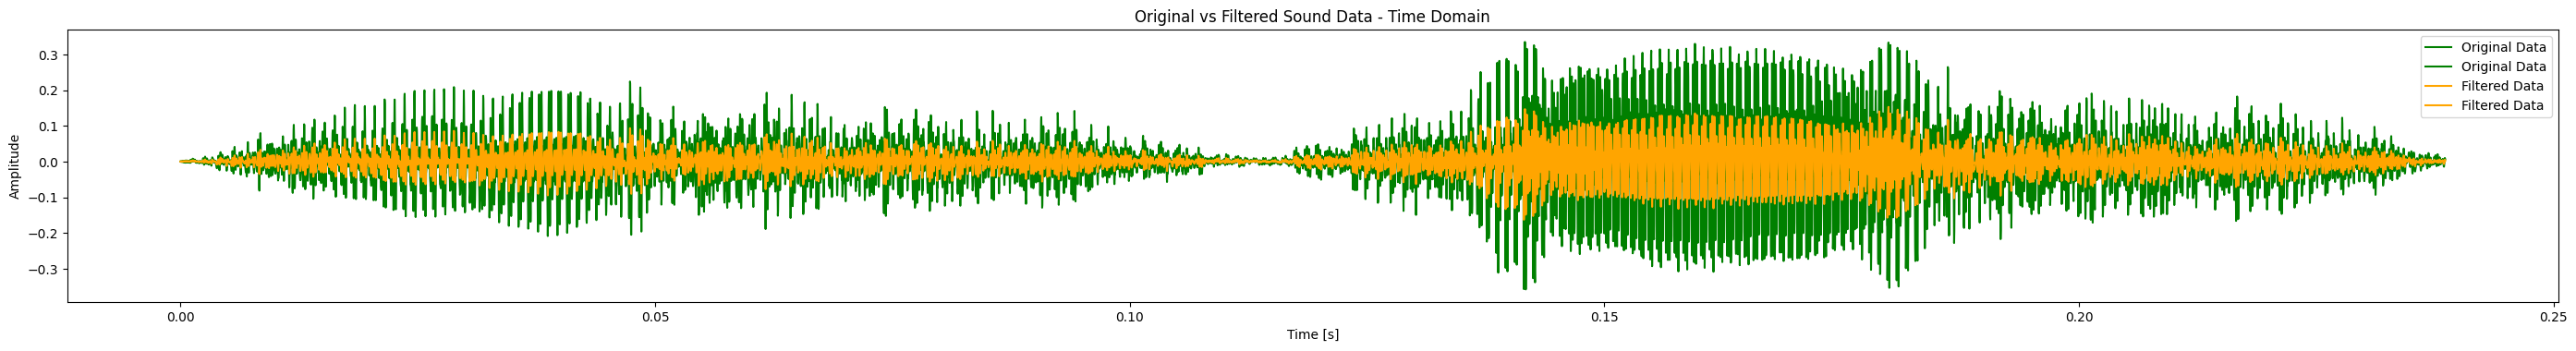

/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


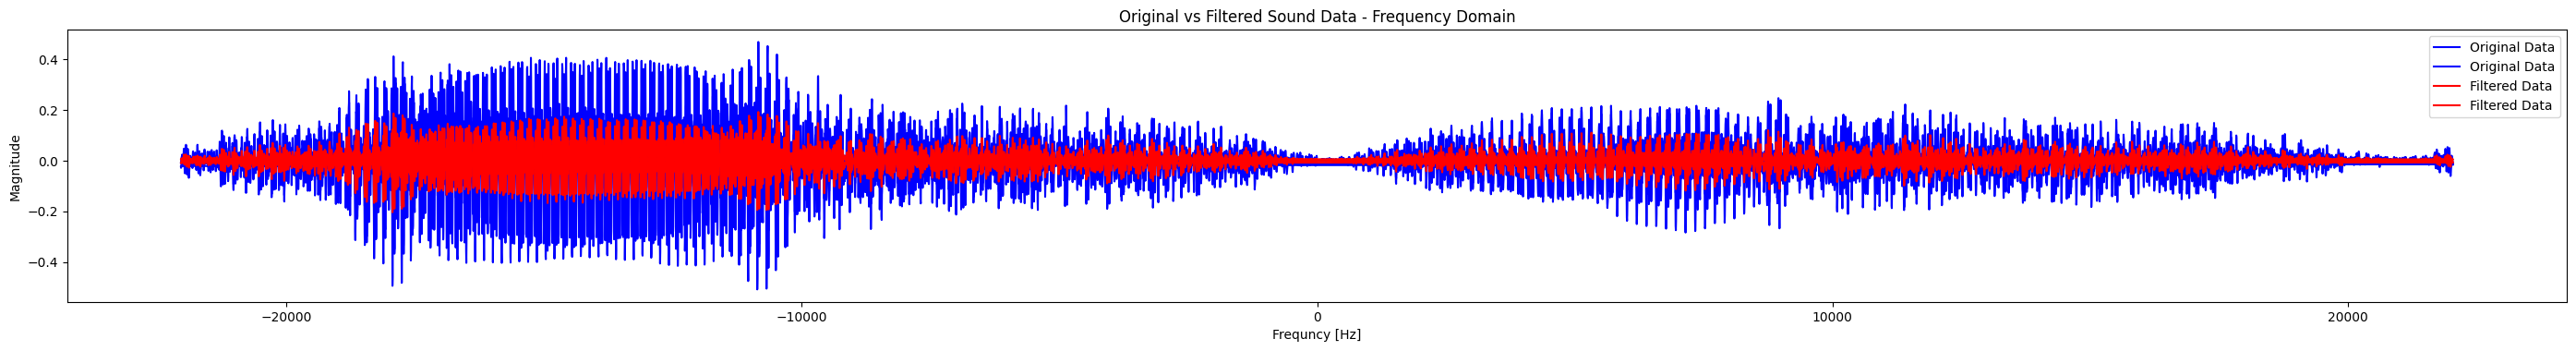

In [7]:
# in the following code we are going
# to plot the before and after of an audio file

import soundfile as sf
import matplotlib.pyplot as plt


before_filter = "/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/AdultVocalizations/BlaBla0506_110302-DC-01.wav"
after_filter = "/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/output_path/BlaBla0506_110302-DC-01.wav"

source , sl = sf.read(before_filter)
filtered, _ = sf.read(after_filter)

# Time axis
time = np.arange(len(source)) / sl
# Plot original data
plt.figure(figsize=(28, 7))
plt.subplot(2, 1, 1)
plt.plot(time, source, label='Original Data', color='green')
plt.plot(time, filtered, label='Filtered Data', color='orange')

plt.title('Original vs Filtered Sound Data - Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

# Plot filtered data
# plt.subplot(2, 1, 2)
# plt.plot(time, filtered, label='Filtered Data', color='red')
# plt.xlabel('Time [s]')
# plt.ylabel('Amplitude')
# plt.legend()

plt.tight_layout()
plt.show()


# Compute the Fourier Transform of the original and filtered data
original_fft = np.fft.fft(source)
filtered_fft = np.fft.fft(filtered)

# Compute the frequency axis
freqs = np.fft.fftfreq(len(source), 1/samplerate)

# Plot original data
plt.figure(figsize=(28, 7))
plt.subplot(2, 1, 1)
plt.plot(freqs, original_fft, label='Original Data', color='blue')
plt.plot(freqs, filtered_fft, label='Filtered Data', color='red')
plt.title('Original vs Filtered Sound Data - Frequency Domain')
plt.xlabel('Frequncy [Hz]')
plt.ylabel('Magnitude')
plt.legend()


# Plot filtered data
# plt.subplot(2, 1, 2)
# plt.plot(freqs, filtered_fft, label='Filtered Data', color='red')
# plt.xlabel('Frequncy [Hz]')
# plt.ylabel('Magnitude')
# plt.legend()

plt.tight_layout()
plt.show()


## Segmentation

In [8]:
def label_finder(file_name):
  """
    This function extracts a label from the given file name based on a predefined dictionary of labels.

    Args:
        file_name (str): The name of the file, expected to end with '.wav'.

    Returns:
        int: The label corresponding to the key found in the file name.
        None: If an error occurs during processing.

    The function uses a dictionary `calls_label_dict` where keys are specific codes (e.g., 'Ag', 'Be')
    and values are corresponding integer labels. It checks if the file name ends with ".wav" and
    then looks for a specific pattern in the file name (two characters following a hyphen). If
    a match is found in the dictionary, the corresponding label is returned. If an exception occurs,
    it prints an error message and returns None.
  """
  calls_label_dict = {'Ag':0,
                      'Be':1,
                      'DC':2,
                      'Di':3,
                      'LT':4,
                      'Ne':5,
                      'So':6,
                      'Te':7,
                      'Th':8,
                      'Tu':9,
                      'Wh':10}

  try:
    if file_name.endswith(".wav"):
      index = file_name.find("-")
      for key in calls_label_dict.keys():
        if file_name[index+1:index+3]== key:
          label = calls_label_dict[key]
          return label
  except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None

out = label_finder("LblRed0613_111202-DC-33.wav")
out

2

In [17]:
import numpy as np
import soundfile as sf
from scipy import signal


lowcut = 20.0

class AudioPreProcessor:
    def __init__(self, filepath):
        self.filepath = filepath
        self.data, self.samplerate = sf.read(filepath)
        self.process_audio()

    def process_audio(self):
        if len(self.data.shape) > 1:
            self.data = np.mean(self.data, axis=1, dtype=self.data.dtype)

    def rectify_audio(self):
        return np.abs(self.data)

    def low_pass_filter(self, data):
        lowcut = 20.0
        nyquist = 0.5 * self.samplerate
        low = lowcut / nyquist
        b, a = signal.butter(N=4, Wn=low, btype='low')
        return signal.lfilter(b, a, data)

    def density_function_of_time(self, data):
        # input is the envelope = data
        times = np.arange(len(data)) / self.samplerate  # time indices converted to seconds
        density = data  # Assuming 'data' is the amplitude envelope
        mean_time = np.sum(times * density) / np.sum(density) if np.sum(density) != 0 else 0
        return mean_time


    def find_local_extrema(self, data, threshold):
        maxima = []
        minima = []
        for i in range(1, len(data) - 1):
            if data[i] > data[i - 1] and data[i] > data[i + 1] and data[i] > threshold:
                maxima.append((i, self.data[i]))
            elif data[i] < data[i - 1] and data[i] < data[i + 1] and data[i] < threshold:
                minima.append((i, self.data[i]))
        return maxima, minima

    def filter_successive_extrema(self, extrema, is_maxima=True):
        selected_extrema = []
        current_group = []
        for index, value in extrema:
            if current_group and index - current_group[-1][0] > 1:
                best = max(current_group, key=lambda x: x[1]) if is_maxima else min(current_group, key=lambda x: x[1])
                selected_extrema.append(best)
                current_group = []
            current_group.append((index, value))
        if current_group:
            best = max(current_group, key=lambda x: x[1]) if is_maxima else min(current_group, key=lambda x: x[1])
            selected_extrema.append(best)
        return selected_extrema

    def segment_vocalizations(self, maxima, minima):
        segments = []
        extrema = sorted(maxima + minima, key=lambda x: x[0])  # Combine and sort by index
        for i in range(1, len(extrema)):
            start_index, _ = extrema[i - 1]
            end_index, _ = extrema[i]
            duration_ms = (end_index - start_index) / self.samplerate * 1000
            if duration_ms >= 30:  # Only include segments longer than 30 ms
                segments.append(self.data[start_index:end_index + 1])
        return segments


    def standardize_segments(self, segments):
        target_length = int(0.35 * self.samplerate)  # 350 ms
        center_time = 0.175  # 175 ms in seconds
        standardized_segments = []
        for segment in segments:
            mean_time = self.density_function_of_time(np.abs(segment))  # Calculate mean time from the envelope
            # Find the index to center
            shift_samples = int((center_time - mean_time) * self.samplerate)
            # Apply padding and centering
            if len(segment) < target_length:
                padding = np.zeros(target_length - len(segment))
                segment = np.concatenate((segment, padding))
            elif len(segment) > target_length:
                segment = segment[:target_length]
            segment = np.roll(segment, shift_samples)  # Roll segment to align
            # Truncate in case the roll exceeds the segment length
            segment = segment[:target_length]
            standardized_segments.append(segment)
        return standardized_segments



    def process(self):
        rectified_data = self.rectify_audio()
        amplitude_envelope = self.low_pass_filter(rectified_data)
        threshold = 0.1 * np.max(amplitude_envelope)
        maxima, minima = self.find_local_extrema(amplitude_envelope, threshold)
        filtered_maxima = self.filter_successive_extrema(maxima, is_maxima=True)
        filtered_minima = self.filter_successive_extrema(minima, is_maxima=False)
        segments = self.segment_vocalizations(filtered_maxima, filtered_minima)
        standardized_segments = self.standardize_segments(segments)
        return standardized_segments

# Usage
processor = AudioPreProcessor("/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/AdultVocalizations/BlaBla0506_110302-DC-01.wav")
segments = processor.process()
print("Segments (Vocalization Bouts):", segments)


Segments (Vocalization Bouts): [array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]


In [ ]:
# this code helps us in flattening the segments
#x = list(itertools.chain.from_iterable(segments))

In [12]:
segments[0]

array([0., 0., 0., ..., 0., 0., 0.])

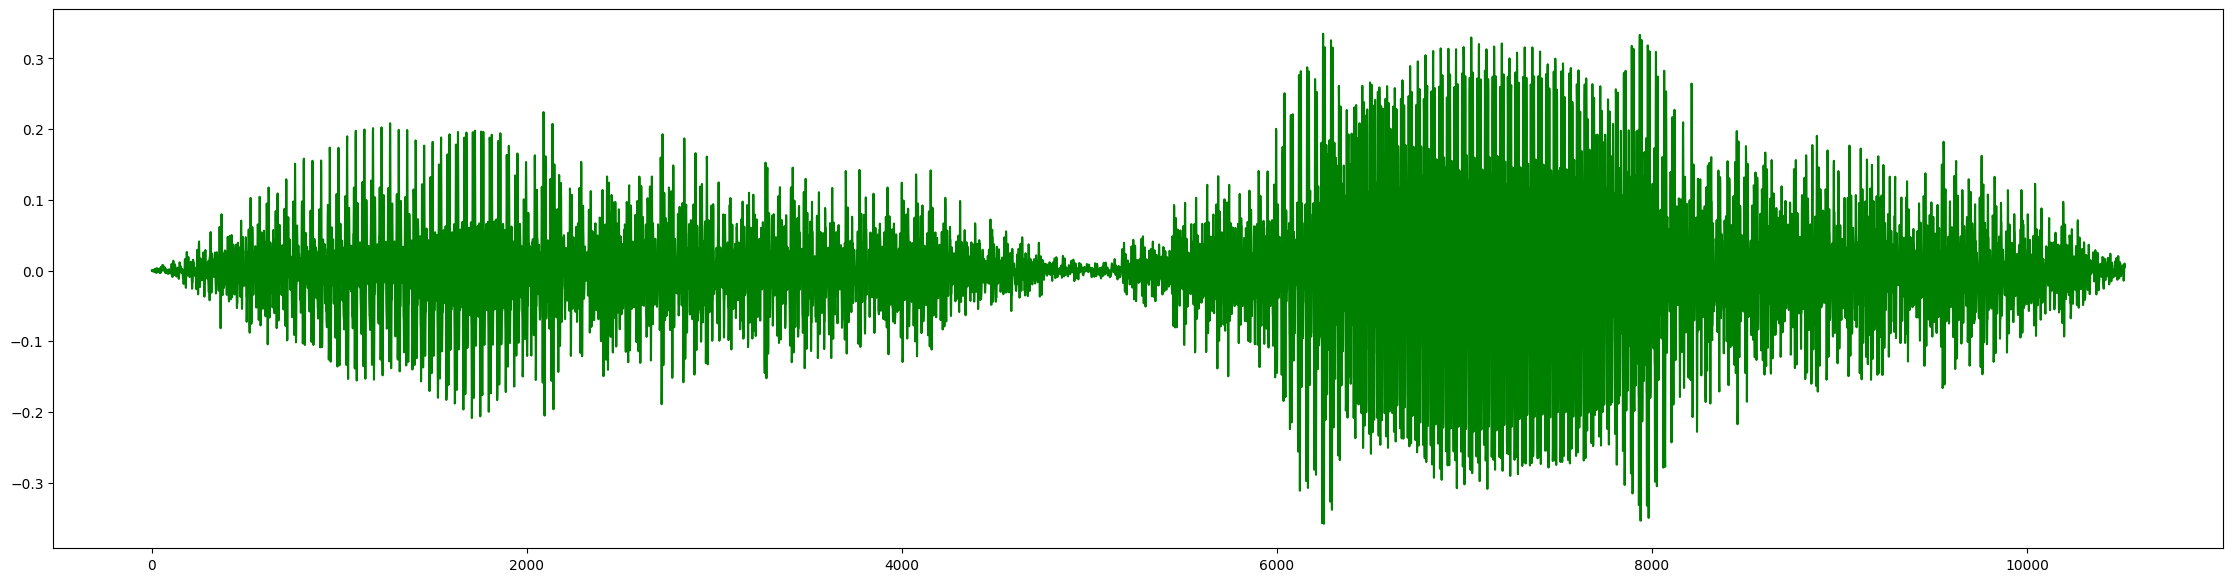

In [12]:
dir = "/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/AdultVocalizations/BlaBla0506_110302-DC-01.wav"
data, sr = sf.read(dir)
plt.figure(figsize=(28, 7))
plt.plot(data, color = "green" )
plt.show()

In [ ]:
len(segments)

2

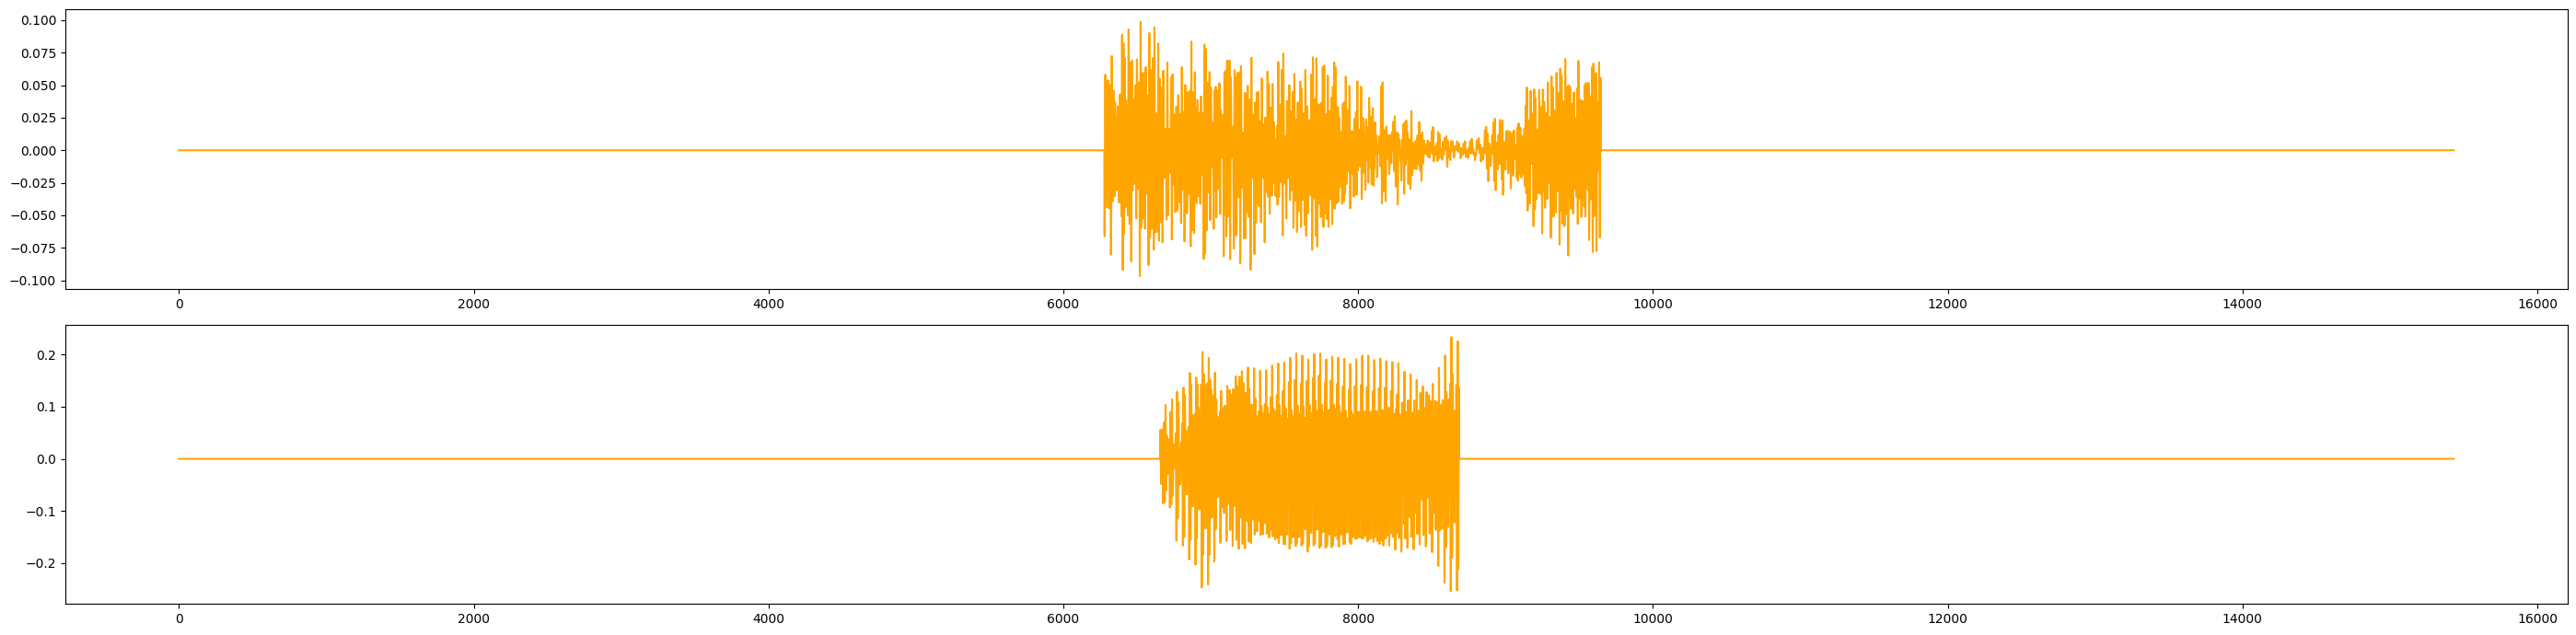

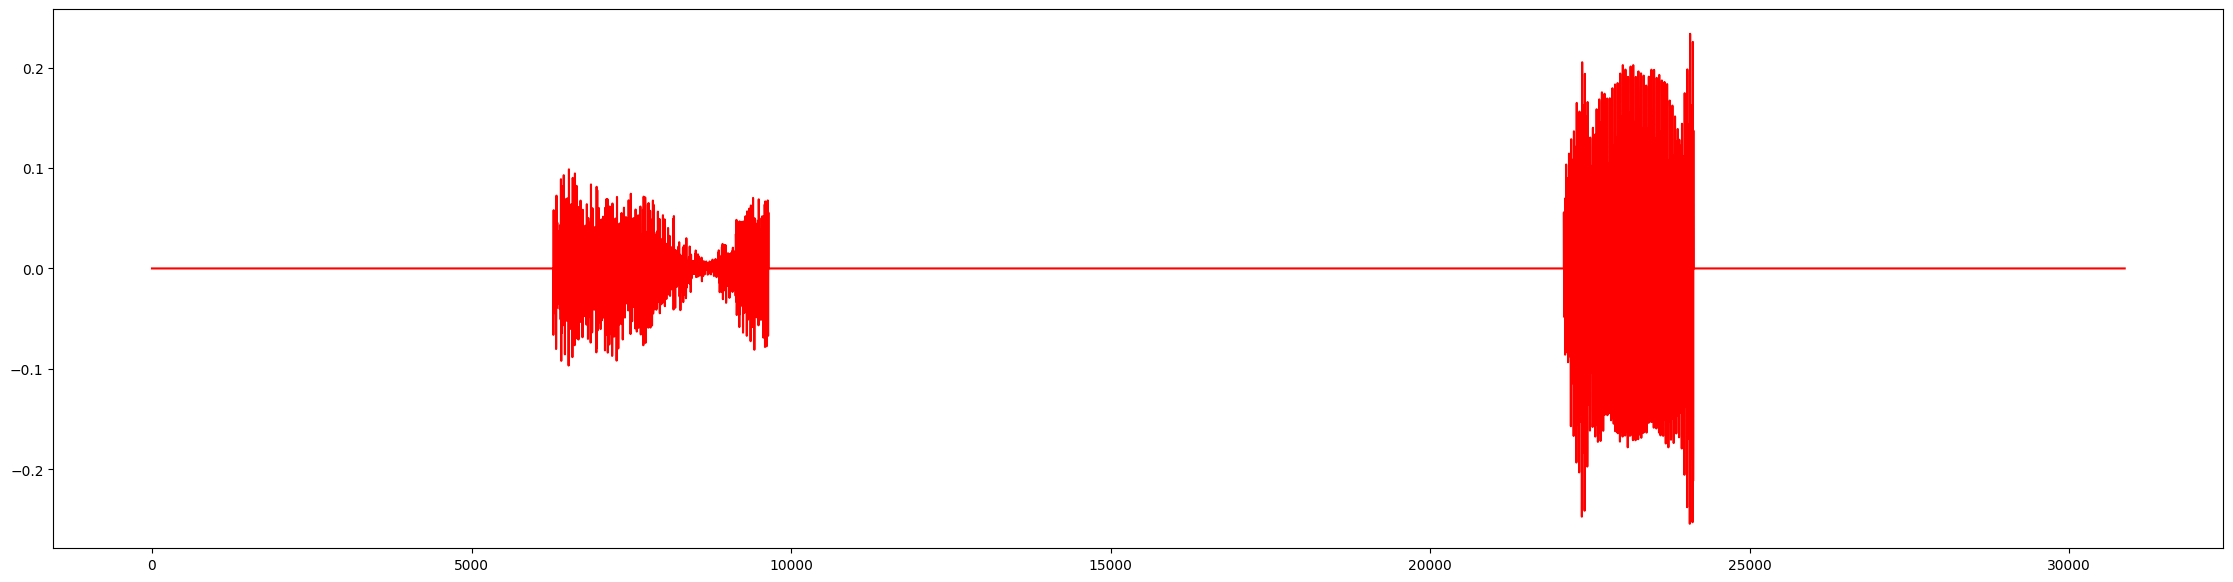

In [13]:
import numpy as np

num_of_figs=len(segments)

plt.figure(figsize=(28, 7))
for plot in range(num_of_figs):
    plt.subplot(num_of_figs, 1, plot+1)
    plt.plot(range(len(segments[plot])), list(segments[plot]), color='orange')


plt.tight_layout()
# calculate range
x = 0
y = []
for i in range(num_of_figs):
    x +=len(segments[i])
    y = np.append(y, list(segments[i]))

plt.figure(figsize=(28, 7))
plt.plot(range(x), y, color = 'red')
plt.show()

In [18]:
import os
# Run this for kaggle
origin_path = "/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/output_path"
list_of_segments = os.listdir(origin_path)
features = []
labels = []

for file in list_of_segments:
    if file.endswith(".wav"):
        new_dir = os.path.join(origin_path, file)
        processor = AudioPreProcessor(new_dir)
        segments = processor.process()
        features.append(segments)
        label =  label_finder(file)
        labels.append(label)
print(f"Audio segmentation is done successfully on the {len(list_of_segments)} Audio files")


Audio segmentation is done successfully on the 2969 Audio files


In [102]:
len(original_features[0])

15434

### preparing features and labels vectors for calculation

In [19]:
counter = 0
# post processing is needed
for segments in features:
       counter += len(segments)
print(f"Total number of features, x is {counter}")

Total number of features, x is 12738


In [20]:
# I used list_of_segments to extract labels
original_features = []
original_labels = []
for index, segments in enumerate(features):
    for segment in segments:
        filename = list_of_segments[index]
        label = label_finder(filename)
        original_labels.append(label)
        # store like below if you want original_features to be flat
        # original_features = [*original_features , *segment]
        original_features.append(segment)
print("features and labels are created successfully.")
original_features

features and labels are created successfully.


[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

In [21]:
import pandas as pd
original_features = np.array(original_features)
df = pd.DataFrame(original_features)

# Save to CSV
csv_filename = '/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/original_features.csv'
df.to_csv(csv_filename, index=True , header=False, sep=',')

In [22]:
df # original_features or the 
# segmented audio files without any processing

,0,1,2,3,4,5,6,7,8,9,...,15424,15425,15426,15427,15428,15429,15430,15431,15432,15433
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
import pandas as pd
original_labels = np.array(original_labels)
labels = pd.DataFrame()
labels['labels'] = original_labels
# Save to CSV
#csv_filename = '/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/original_labels.csv'
#labels.to_csv(csv_filename, index=False, header=False)

In [204]:
labels

,labels
0,2
1,2
2,2
3,2
4,2
...,...
12733,6
12734,6
12735,6
12736,6


In [ ]:
import shutil
from google.colab import files

with open('features.txt', 'w') as fl:
  for array in original_features:
    line = ' '.join(map(str, array))
    fl.write(line + '\n')

# Download the file
# files.download('features.txt')
# Copy the file from Colab to Google Drive
destination_path = "/content/drive/MyDrive/Arshad/features.txt"
shutil.copy('features.txt', destination_path)

'/content/drive/MyDrive/Arshad/features.txt'

In [ ]:
with open('/content/drive/MyDrive/Arshad/labels.txt', 'w') as fl:
  for line in original_labels:
    fl.write(f'{line}\n')


# Download the file
# files.download('labels.txt')
# Copy the file from Colab to Google Drive
destination_path = "/content/drive/MyDrive/Arshad/labels.txt"
shutil.copy('labels.txt', destination_path)

'/content/drive/MyDrive/Arshad/labels.txt'

_______


At the end of this part, we would have a text file that stores the features and labels seperately.
In the original paper, they have implemented 4 different ways of feature extraction, we are going to implement them step by step and see which one works the best.

The first one is Predefine Acoustical Features(PAFs)


# PAFs

here we are computing ##STFT in other parts we

---

can compute ## wavelet and ## Chriplet and ##MFCC as well.

Temporal Features (5 parameters)
Temporal Centroid (Mean T) - The mean of the temporal envelope.
Temporal Duration (Std T) - The standard deviation of the temporal envelope, describing its spread.
Temporal Skewness (Skew T) - Measures the asymmetry of the temporal envelope.
Temporal Kurtosis (Kurt T) - Indicates the peakedness of the temporal envelope.
Temporal Entropy (Ent T) - Captures the overall variability in the temporal envelope.
Spectral Features (8 parameters)
Spectral Centroid (Mean S) - The mean of the spectral envelope.
Spectral Bandwidth (Std S) - The standard deviation of the spectral envelope, describing its spread.
Spectral Skewness (Skew S) - Measures the asymmetry of the spectral envelope.
Spectral Kurtosis (Kurt S) - Indicates the peakedness of the spectral envelope.
Spectral Entropy (Ent S) - Captures the overall variability in the spectral envelope.
First Quartile (Q1) - Represents the frequency below which 25% of the energy of the spectral envelope is contained.
Second Quartile (Q2) - Represents the median frequency, below which 50% of the energy is contained.
Third Quartile (Q3) - Represents the frequency below which 75% of the energy is contained.
Intensity or Loudness Features (2 parameters)
Root Mean Square (RMS) - Calculates the RMS of the signal obtained directly from the sound pressure waveform.
Peak Amplitude of the Temporal Envelope (Max A) - The maximum amplitude found in the temporal envelope.

These features include:

Pitch Saliency (Sal) - A measure of the average "pitchiness" of the vocalization, estimated by averaging the ratio of the amplitude of the largest peak in the auto-correlation function to the amplitude of the peak at zero delay across time.

Mean Fundamental Frequency (mean F0) - The average fundamental frequency over time.

Maximum Fundamental Frequency (Max F0) - The highest fundamental frequency detected.

Minimum Fundamental Frequency (Min F0) - The lowest fundamental frequency detected.

Coefficient of Variation of Fundamental Frequency (CV F0) - A measure of the frequency modulation, represented by the variability in fundamental frequency relative to its mean.

Second Voice Parameter (2nd V) - Represents the percentage of time when a second voice is detected in the presence of a fundamental frequency.

Peak 2 Parameter (Pk 2) - The average frequency of secondary peaks detected in the spectrum, which are not explained by the fundamental frequency or its harmonics and may indicate inharmonic structures or dual sources.

In [ ]:
# read labels
labels = []
with open('/content/drive/MyDrive/Arshad/labels.txt', 'r') as fl:
    for line in fl:
      labels = np.append(labels, line.split('\n')[0])

len(labels)


### Do preprocessing later

In [ ]:
import numpy as np
# Reading data back from the file
data = []
with open('/content/drive/MyDrive/Arshad/features.txt', 'r') as file:
    for line in file:
        array = np.array(list(map(float, line.split())))
        data.append(array)

# Example to print one of the arrays
print(len(data[0]))


15434


In [99]:
print(len(data))
print(type(data))
print(len(data[0]))


1433
<class 'numpy.ndarray'>
2


## Envelope Detection 

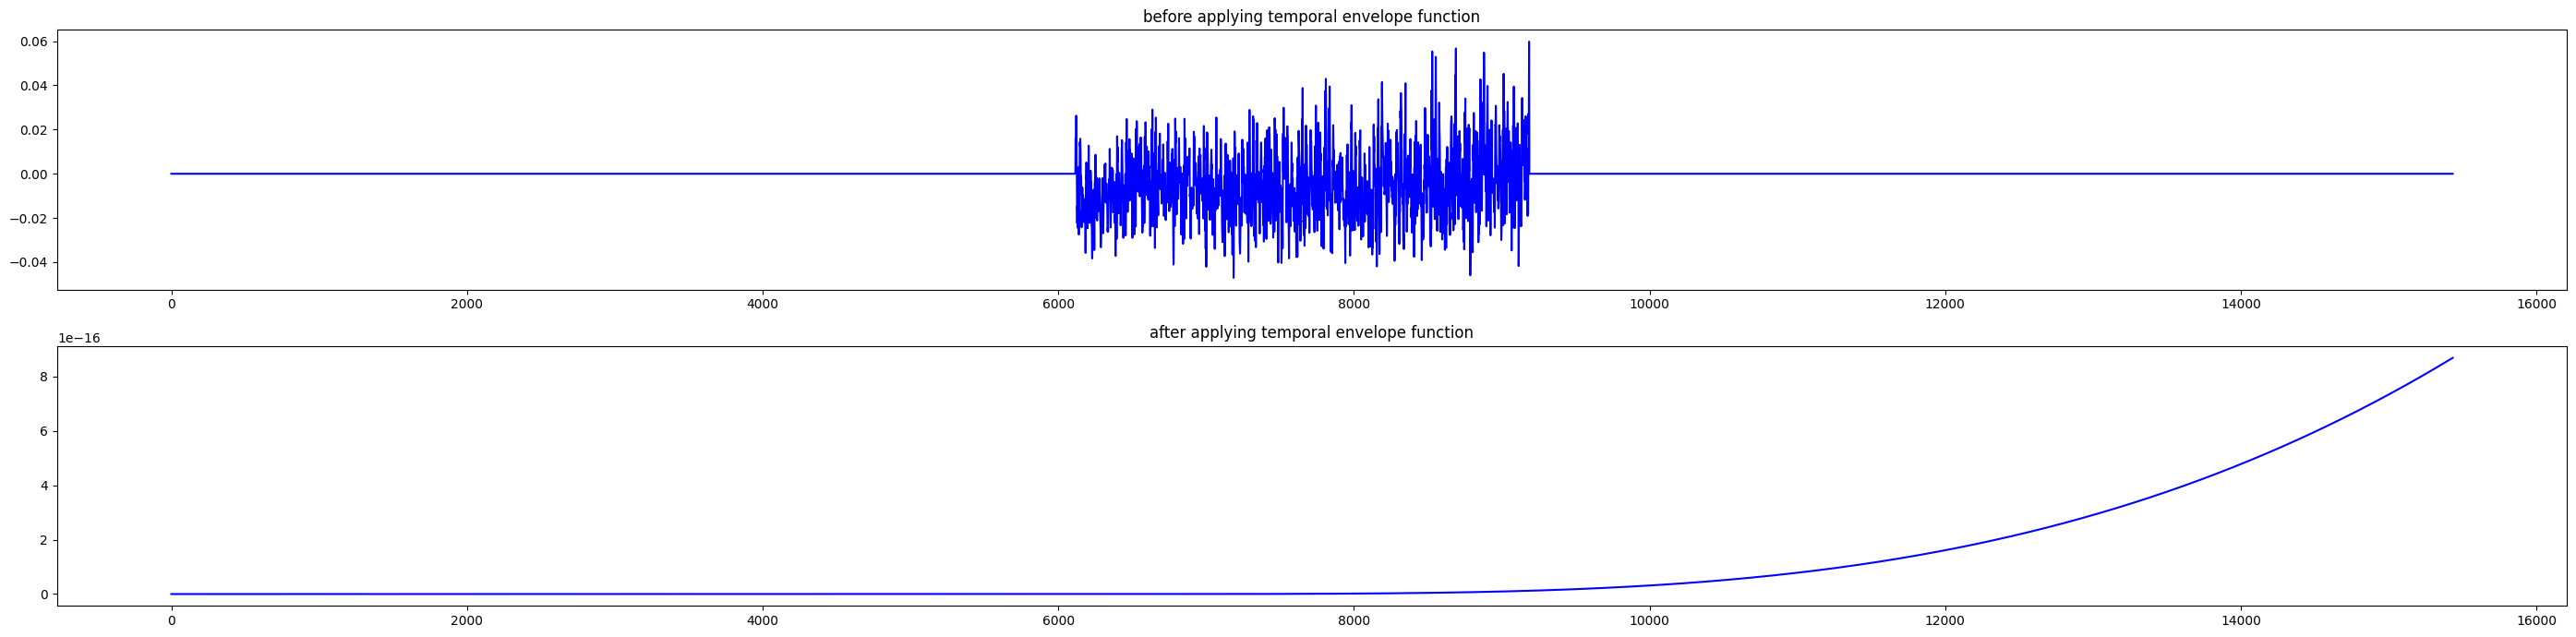

In [ ]:
# before temporal envelope
import matplotlib.pyplot as plt

plt.figure(figsize=(28,7))
plt.subplot(2, 1, 1)
plt.plot(data[0], color='blue')
plt.title("before applying temporal envelope function")
plt.subplot(2, 1, 2)
plt.title("after applying temporal envelope function")
plt.plot(temporal_envelope[:15434], color='blue')
plt.tight_layout()
plt.show()

In [26]:
from scipy.signal import butter, lfilter, filtfilt
from scipy.signal import hilbert


# features extraction
## Envelope Detection 
## Temporal features

### 2. Temporal duration
### 3. Temporal skewness
### 4. Temporal kurtosis
### 5. Temporal entropy

SR = 44100
temporal_envelope_flag = True
temporal_centroid_flag = False
class EnvelopeDetection:
  def __init__(self, data,rect_low_ED_flag = True, 
               Hilbert_ED_flag = True,
               Dynamic_Range_ED_flag = True, 
               samplerate = 44100, cutoff =20,
               order=5, 
               Threshold = 0.5,
               Ratio= 2.0 ):
    self.data = data
    self.rect_low_ED_flag = rect_low_ED_flag
    self.Hilbert_ED_flag = Hilbert_ED_flag
    self.Dynamic_Range_ED_flag = Dynamic_Range_ED_flag
    self.samplerate = samplerate 
    self.cutoff = cutoff
    self.order = order
    self.Threshold = Threshold
    self.Ratio = Ratio
    self.apply_ED()

    ### 1. Temporal centriod : The mean of the temporal envelope.
    # lowpass filtering
  def lowpass_filter(self, timeseries_segment, samplerate , cutoff, order):
    nyq = 0.5 * samplerate
    normal_cutoff = cutoff #/ nyq
    # obtain filter's coefficients
    b, a = butter(order, Wn= normal_cutoff, btype='low', analog=False, fs= self.samplerate)
    res = filtfilt(b, a, timeseries_segment)
    return res


    # obtain temporal envelope
  def temp_envelope_preprocessing(self, data):
    # rectify
    data_segment = abs(data)
    envelope = self.lowpass_filter(data_segment, self.samplerate, self.cutoff, self.order)
    total = np.sum(envelope)
    if abs(total) > 0:
        normalized_envelope = envelope / total
    else:
        normalized_envelope = envelope  # Handle cases where the sum might be zero
    return normalized_envelope


  def hilbert_envelope(self, data):

      analytic_signal = hilbert(data)
      envelope = np.abs(analytic_signal)
      return envelope
      


  def dynamic_range_compression(self, data, threshold, ratio, make_up_gain=1.0):
      # Apply compression
      compressed_signal = np.copy(data)
      for i in range(len(signal)):
          if np.abs(data[i]) > threshold:
              compressed_signal[i] = threshold + (data[i] - threshold) / ratio
      # Apply make-up gain
      compressed_signal *= make_up_gain
      return compressed_signal
      
  def apply_ED(self): 
    if self.rect_low_ED_flag: 
      return self.temp_envelope_preprocessing(self.data)
    if self.Hilbert_ED_flag:
      return self.hilbert_envelope(self.data)
    elif self.Dynamic_Range_ED_flag:
      return self.dynamic_range_compression(self.data, self.Threshold, self.Ratio)
      
      
      




# for index, audio in enumerate(data):
#   if temporal_envelope_flag == True: # flag defined
#     temporal_envelope = np.append(temporal_envelope, temp_envelope_preprocessing(audio))
#     print(index)

#   elif temporal_centroid_flag == True: # flag defined
#     centroid = np.append(centroid , compute_temporal_centroid(audio))

threshold = 0.5  # Set threshold
ratio = 2.0  
ED_instance = EnvelopeDetection(df.loc[0], 
                                rect_low_ED_flag=True,
                                Hilbert_ED_flag=False, 
                                Dynamic_Range_ED_flag=False)
res = ED_instance.apply_ED()
# x = temp_envelope_preprocessing(df.loc[0])
# y = hilbert_envelope(df.loc[0])
# z = dynamic_range_compression(df.loc[0], threshold, ratio)

In [27]:
# Do the envelope detection for all the samples
temporal_envelopes = []
for index, sample in df.iterrows():
    ED_instance = EnvelopeDetection(sample, 
                                rect_low_ED_flag=True,
                                Hilbert_ED_flag=False, 
                                Dynamic_Range_ED_flag=False)
    envelope = ED_instance.apply_ED()
    temporal_envelopes.append(envelope)
    print(index)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [111]:
# Convert the list to pd since it's faster to work with them
pd_temporal_envelopes = pd.DataFrame(temporal_envelopes)
type(pd_temporal_envelopes)

pandas.core.frame.DataFrame

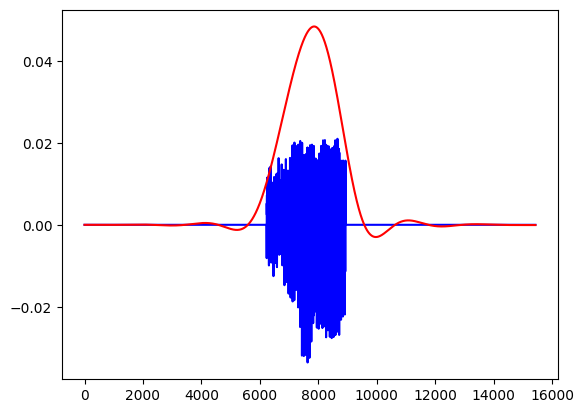

In [208]:
plt.plot(df.loc[0], color ='blue')
#plt.plot(x*50, color='red')
#plt.plot(y, color='red')
plt.plot(res*100, color='red')

## Temporal Features (5 features)

In [209]:
## Temporal features

### 2. Temporal duration
### 3. Temporal skewness
### 4. Temporal kurtosis
### 5. Temporal entropy
pd_temporal_envelopes

,0,1,2,3,4,5,6,7,8,9,...,15424,15425,15426,15427,15428,15429,15430,15431,15432,15433
0,-7.082379e-09,-7.438992e-09,-7.796175e-09,-8.153925e-09,-8.512240e-09,-8.871118e-09,-9.230558e-09,-9.590557e-09,-9.951114e-09,-1.031223e-08,...,-6.080811e-07,-6.080811e-07,-6.080811e-07,-6.080811e-07,-6.080811e-07,-6.080811e-07,-6.080811e-07,-6.080811e-07,-6.080811e-07,-6.080811e-07
1,2.176263e-07,2.175534e-07,2.174786e-07,2.174019e-07,2.173233e-07,2.172428e-07,2.171604e-07,2.170760e-07,2.169898e-07,2.169016e-07,...,-8.936877e-07,-8.936877e-07,-8.936877e-07,-8.936877e-07,-8.936877e-07,-8.936877e-07,-8.936877e-07,-8.936877e-07,-8.936877e-07,-8.936877e-07
2,-2.839358e-08,-2.878488e-08,-2.917663e-08,-2.956884e-08,-2.996150e-08,-3.035461e-08,-3.074817e-08,-3.114217e-08,-3.153661e-08,-3.193150e-08,...,-5.086914e-07,-5.086914e-07,-5.086914e-07,-5.086914e-07,-5.086914e-07,-5.086914e-07,-5.086914e-07,-5.086914e-07,-5.086914e-07,-5.086914e-07
3,1.795165e-07,1.793081e-07,1.790978e-07,1.788857e-07,1.786718e-07,1.784560e-07,1.782384e-07,1.780189e-07,1.777976e-07,1.775745e-07,...,-8.255971e-07,-8.255971e-07,-8.255971e-07,-8.255971e-07,-8.255971e-07,-8.255971e-07,-8.255971e-07,-8.255971e-07,-8.255971e-07,-8.255971e-07
4,2.140829e-07,2.139600e-07,2.138352e-07,2.137084e-07,2.135797e-07,2.134490e-07,2.133163e-07,2.131817e-07,2.130450e-07,2.129065e-07,...,-9.058643e-07,-9.058643e-07,-9.058643e-07,-9.058643e-07,-9.058643e-07,-9.058643e-07,-9.058643e-07,-9.058643e-07,-9.058643e-07,-9.058643e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733,-1.933652e-07,-1.935940e-07,-1.938215e-07,-1.940479e-07,-1.942730e-07,-1.944970e-07,-1.947199e-07,-1.949415e-07,-1.951619e-07,-1.953811e-07,...,-5.540828e-07,-5.540828e-07,-5.540828e-07,-5.540828e-07,-5.540828e-07,-5.540828e-07,-5.540828e-07,-5.540828e-07,-5.540828e-07,-5.540828e-07
12734,1.278305e-07,1.279573e-07,1.280833e-07,1.282085e-07,1.283329e-07,1.284564e-07,1.285792e-07,1.287010e-07,1.288221e-07,1.289423e-07,...,-1.068331e-06,-1.068331e-06,-1.068331e-06,-1.068331e-06,-1.068331e-06,-1.068331e-06,-1.068331e-06,-1.068331e-06,-1.068331e-06,-1.068331e-06
12735,-1.173326e-07,-1.173048e-07,-1.172759e-07,-1.172461e-07,-1.172152e-07,-1.171834e-07,-1.171505e-07,-1.171166e-07,-1.170817e-07,-1.170458e-07,...,-8.503886e-08,-8.503886e-08,-8.503886e-08,-8.503886e-08,-8.503886e-08,-8.503886e-08,-8.503886e-08,-8.503886e-08,-8.503886e-08,-8.503886e-08
12736,1.052946e-07,1.046587e-07,1.040207e-07,1.033808e-07,1.027390e-07,1.020951e-07,1.014493e-07,1.008015e-07,1.001517e-07,9.950002e-08,...,3.740933e-07,3.740933e-07,3.740933e-07,3.740933e-07,3.740933e-07,3.740933e-07,3.740933e-07,3.740933e-07,3.740933e-07,3.740933e-07


In [210]:
from scipy.stats import skew, kurtosis, entropy

class TemporalFeatures: 
  def __init__(self, temporal_envelope):
    self.temporal_envelope = np.array(temporal_envelope)
    self.normalize_envelope = self._normalize_envelope()
    
    
  def _normalize_envelope(self):
    total = np.sum(self.temporal_envelope)

    if total != 0:
      normalized = self.temporal_envelope / total
      #normalized[normalized == 0] =  5
      return normalized
    else: 
      return self.temporal_envelope #+ 5

    
    
  def compute_centroid(self):
    # Compute the temporal centroid
    time_indices = np.arange(len(self.temporal_envelope))
    temporal_centroid = np.sum(time_indices * self.temporal_envelope) / np.sum(self.temporal_envelope)
      
    return temporal_centroid
    
  def compute_duration(self):
    return np.std(self.temporal_envelope)
  
  def compute_skewness(self):
    return skew(self.temporal_envelope)
  
  def compute_kurtosis(self):
    return kurtosis(self.temporal_envelope)
  
  def compute_entropy(self):
    return entropy(abs(self.normalize_envelope))

  
temp_centroids = [] 
temp_durations = []
temp_skewnesses = []
temp_kurtosises = []
temp_entropies = []
pd_temporal_envelopes_copy = pd_temporal_envelopes.copy(deep=True)

for index, sample in pd_temporal_envelopes.iterrows():
    instance = TemporalFeatures(sample)
    temp_centroids.append(instance.compute_centroid())
    temp_durations.append(instance.compute_duration())
    temp_skewnesses.append(instance.compute_skewness())
    temp_kurtosises.append(instance.compute_kurtosis())
    temp_entropies.append(instance.compute_entropy())
    
pd_temporal_envelopes_copy['temp_centroids'] = temp_centroids    
pd_temporal_envelopes_copy['temp_durations'] = temp_durations 
pd_temporal_envelopes_copy['temp_skewnesses'] = temp_skewnesses
pd_temporal_envelopes_copy['temp_kurtosises'] = temp_kurtosises
pd_temporal_envelopes_copy['temp_entropies'] = temp_entropies
    

/var/folders/qq/l2hgbt4j137czc91wy54tchm0000gn/T/ipykernel_6711/3557090080.py:24: RuntimeWarning: invalid value encountered in scalar divide
  temporal_centroid = np.sum(time_indices * self.temporal_envelope) / np.sum(self.temporal_envelope)


In [211]:
pd_temporal_envelopes_copy

,0,1,2,3,4,5,6,7,8,9,...,15429,15430,15431,15432,15433,temp_centroids,temp_durations,temp_skewnesses,temp_kurtosises,temp_entropies
0,-7.082379e-09,-7.438992e-09,-7.796175e-09,-8.153925e-09,-8.512240e-09,-8.871118e-09,-9.230558e-09,-9.590557e-09,-9.951114e-09,-1.031223e-08,...,-6.080811e-07,-6.080811e-07,-6.080811e-07,-6.080811e-07,-6.080811e-07,7715.195022,0.000141,1.983033,2.442324,8.232698
1,2.176263e-07,2.175534e-07,2.174786e-07,2.174019e-07,2.173233e-07,2.172428e-07,2.171604e-07,2.170760e-07,2.169898e-07,2.169016e-07,...,-8.936877e-07,-8.936877e-07,-8.936877e-07,-8.936877e-07,-8.936877e-07,7711.422207,0.000157,2.252702,3.645552,8.148079
2,-2.839358e-08,-2.878488e-08,-2.917663e-08,-2.956884e-08,-2.996150e-08,-3.035461e-08,-3.074817e-08,-3.114217e-08,-3.153661e-08,-3.193150e-08,...,-5.086914e-07,-5.086914e-07,-5.086914e-07,-5.086914e-07,-5.086914e-07,7715.676447,0.000138,1.922232,2.184360,8.260726
3,1.795165e-07,1.793081e-07,1.790978e-07,1.788857e-07,1.786718e-07,1.784560e-07,1.782384e-07,1.780189e-07,1.777976e-07,1.775745e-07,...,-8.255971e-07,-8.255971e-07,-8.255971e-07,-8.255971e-07,-8.255971e-07,7712.834355,0.000153,2.171809,3.259134,8.175095
4,2.140829e-07,2.139600e-07,2.138352e-07,2.137084e-07,2.135797e-07,2.134490e-07,2.133163e-07,2.131817e-07,2.130450e-07,2.129065e-07,...,-9.058643e-07,-9.058643e-07,-9.058643e-07,-9.058643e-07,-9.058643e-07,7711.925124,0.000156,2.222983,3.501638,8.164328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733,-1.933652e-07,-1.935940e-07,-1.938215e-07,-1.940479e-07,-1.942730e-07,-1.944970e-07,-1.947199e-07,-1.949415e-07,-1.951619e-07,-1.953811e-07,...,-5.540828e-07,-5.540828e-07,-5.540828e-07,-5.540828e-07,-5.540828e-07,7714.933468,0.000134,1.922622,2.328505,8.332424
12734,1.278305e-07,1.279573e-07,1.280833e-07,1.282085e-07,1.283329e-07,1.284564e-07,1.285792e-07,1.287010e-07,1.288221e-07,1.289423e-07,...,-1.068331e-06,-1.068331e-06,-1.068331e-06,-1.068331e-06,-1.068331e-06,7709.366915,0.000159,2.353197,4.149579,8.070907
12735,-1.173326e-07,-1.173048e-07,-1.172759e-07,-1.172461e-07,-1.172152e-07,-1.171834e-07,-1.171505e-07,-1.171166e-07,-1.170817e-07,-1.170458e-07,...,-8.503886e-08,-8.503886e-08,-8.503886e-08,-8.503886e-08,-8.503886e-08,7719.467919,0.000125,1.744407,1.636778,8.393022
12736,1.052946e-07,1.046587e-07,1.040207e-07,1.033808e-07,1.027390e-07,1.020951e-07,1.014493e-07,1.008015e-07,1.001517e-07,9.950002e-08,...,3.740933e-07,3.740933e-07,3.740933e-07,3.740933e-07,3.740933e-07,7723.021902,0.000135,1.826616,1.808661,8.329442


So far 5 features are implemented, you can find them in:pd_temporal_envelopes_copy

## Spectral Features (8 features)

In [328]:
np.array(pd_temporal_envelopes.loc[0])

array([-7.08237878e-09, -7.43899238e-09, -7.79617502e-09, ...,
       -6.08081111e-07, -6.08081111e-07, -6.08081111e-07])

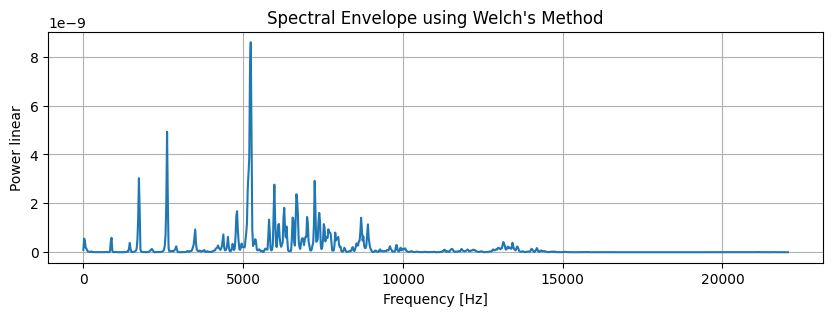

In [29]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

def calculate_spectral_envelope_and_plot(audio_path):
    # Load audio file
    sr =44100
    y = np.array(audio_path)
    #y = y / np.sum(y)
    # Define the window length and overlap
    window_length = int(0.0420 * sr)  # 42 ms window length
    overlap = int(window_length * 0.99)  # 99% overlap
    
    # Calculate the power spectrum using Welch's method
    f, Pxx = welch(y, fs=sr, window='hann', nperseg=window_length, noverlap=overlap, scaling='density')
    
    # Convert power to decibels (dB)
    Pxx_dB = 10 * np.log10(Pxx)

    # Plot the frequency power spectrum in dB
    plt.figure(figsize=(10, 3))
    plt.plot(f, Pxx)
    plt.title('Spectral Envelope using Welch\'s Method')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power linear')
    plt.grid(True)
    plt.show()

    
# Replace 'path_to_audio.wav' with the path to your audio file
calculate_spectral_envelope_and_plot(df.loc[1000])




In [30]:
df

,0,1,2,3,4,5,6,7,8,9,...,15424,15425,15426,15427,15428,15429,15430,15431,15432,15433
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


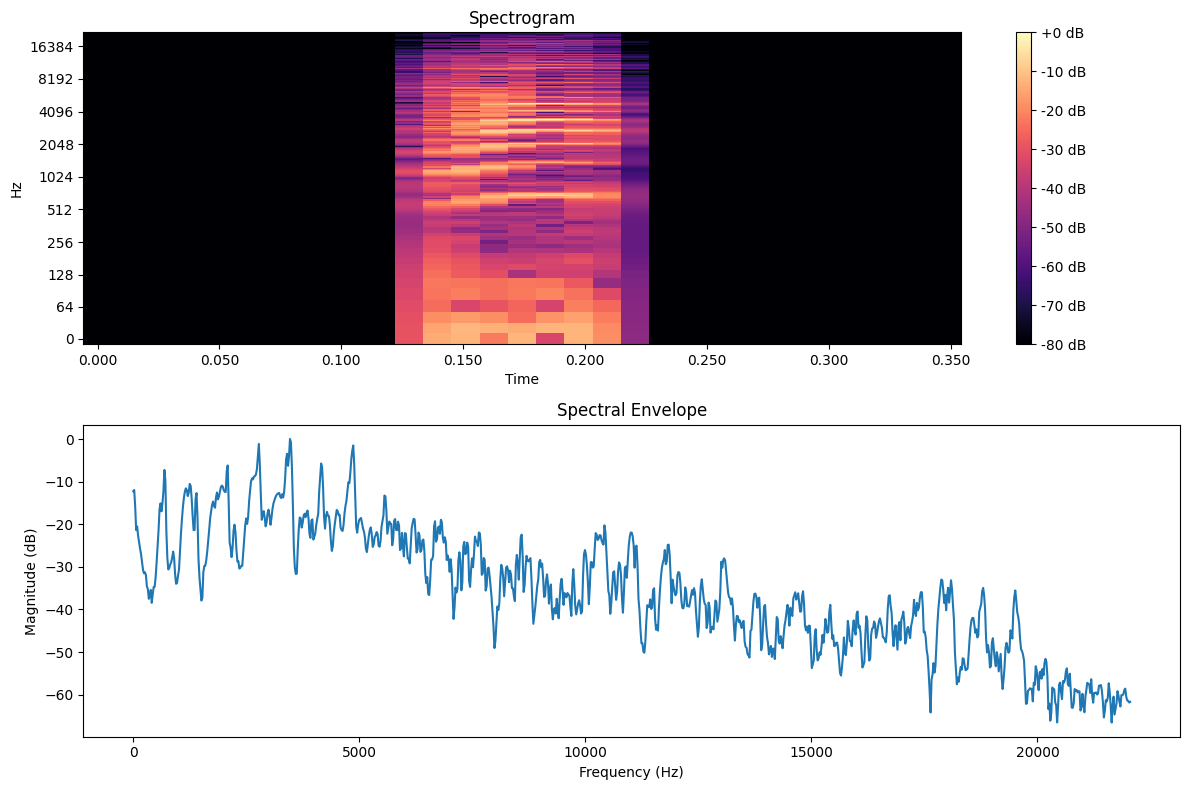

In [31]:
def calculate_spectral_envelope(audio_path):
    # Load audio file
    y = np.array(audio_path)
    sr =44100
    # Calculate the Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)
    
    # Convert amplitude to decibels for visualization
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    # Compute the spectral envelope using the max filter method in the frequency axis
    spectral_envelope = np.max(S_db, axis=1)
    
    # Plot the STFT and the spectral envelope
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')

    plt.subplot(2, 1, 2)
    freqs = librosa.fft_frequencies(sr=sr)
    plt.plot(freqs, spectral_envelope)
    plt.title('Spectral Envelope')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.tight_layout()
    
    plt.show()

# Replace 'path_to_audio.wav' with the path to your audio file
calculate_spectral_envelope(df.loc[0])

In [32]:
# features extraction
## Spectral Envelope Extraction 
## Spectral features
from scipy.signal import welch
from scipy.signal.windows import hann
fs = 44100
def compute_spectral_envelope(data):
    """
    Compute the Power Spectral Density (PSD) using Welch's method with a Hanning window.

    Parameters:
    - data: numpy array of sampled data.
    - fs: sampling frequency of the data in Hz.

    Returns:
    - freqs: Array of frequency bins.
    - psd: Array of power spectral density values.
    """

    # Convert window length from time to samples: 42 ms window length
    window_length_ms = 42
    window_length_samples = int(fs * (window_length_ms / 1000))

    # Overlap: 99%
    overlap_samples = int(0.99 * window_length_samples)

    # Create a Hanning window
    window = hann(window_length_samples)

    # Use Welch's method to estimate the PSD
    freqs, psd = welch(data, fs=fs, 
                       window=window, 
                       nperseg=window_length_samples,
                       noverlap=overlap_samples,
                       scaling='density')

    return freqs, psd
     


df_copy = df.copy(deep=True)
PSD_of_envelopes = []
freqs_of_envelopes = []
#df_copy = df.copy(deep=True)

for index, sample in df.iterrows():
    freqs, psd = compute_spectral_envelope(np.array(df_copy.loc[index]))
    PSD_of_envelopes.append(psd)
    freqs_of_envelopes.append(freqs)
    print(index)


pd_spectral_envelope = pd.DataFrame()
pd_spectral_envelope['PSD_of_envelopes'] = PSD_of_envelopes
pd_spectral_envelope['freqs_of_envelopes'] = freqs_of_envelopes
pd_spectral_envelope

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,PSD_of_envelopes,freqs_of_envelopes
0,"[1.1639059820252198e-09, 5.225902254518959e-09...","[0.0, 23.81209503239741, 47.62419006479482, 71..."
1,"[5.361809797076766e-10, 2.423801689288649e-09,...","[0.0, 23.81209503239741, 47.62419006479482, 71..."
2,"[3.0180724784058516e-10, 1.446443968594938e-09...","[0.0, 23.81209503239741, 47.62419006479482, 71..."
3,"[3.921314967085138e-11, 1.9051776045933464e-10...","[0.0, 23.81209503239741, 47.62419006479482, 71..."
4,"[5.5118671338987256e-11, 2.548243635998103e-10...","[0.0, 23.81209503239741, 47.62419006479482, 71..."
...,...,...
12733,"[1.9802035321332998e-10, 9.36841896921217e-10,...","[0.0, 23.81209503239741, 47.62419006479482, 71..."
12734,"[2.5525161451921397e-10, 1.0227138315781812e-0...","[0.0, 23.81209503239741, 47.62419006479482, 71..."
12735,"[3.013355766372109e-10, 1.2199837798958487e-09...","[0.0, 23.81209503239741, 47.62419006479482, 71..."
12736,"[1.6527541120188187e-10, 4.623958035675659e-10...","[0.0, 23.81209503239741, 47.62419006479482, 71..."


In [93]:
import numpy as np
from scipy.stats import skew, kurtosis, entropy

sr = 44100
class SpectralFeatures():
    def __init__(self, spectral_envelope, sr):
        self.spectral_envelope = np.array(spectral_envelope)
        self.frequency_indices = np.arange(len(spectral_envelope))
        self.sr = sr
        self.spectral_centroid_attribute = self.calculate_spectral_centroid()
        
    def calculate_spectral_centroid(self):
        return np.sum(self.frequency_indices * self.spectral_envelope) / np.sum(self.spectral_envelope)
        
    
    
    def spectral_bandwidth(self):
        return np.sqrt(np.sum((self.frequency_indices - self.spectral_centroid_attribute)**2 * self.spectral_envelope) / np.sum(self.spectral_envelope))
        
    
    
    def spectral_skewness(self):
        return skew(self.spectral_envelope) # Spectral Skewness and Kurtosis
    
    def spectral_kurtosis(self):
        return kurtosis(self.spectral_envelope)
    

    def spectral_entropy(self):
    #     if np.sum(self.spectral_envelope) == 0:
    #         normalized_envelope = self.spectral_envelope
    #     else:
    #         normalized_envelope = self.spectral_envelope / np.sum(self.spectral_envelope)
    #     spectral_entropy = entropy(normalized_envelope)
    #     return spectral_entropy
        if np.sum(self.spectral_envelope) > 0:
            normalized_envelope = self.spectral_envelope / np.sum(self.spectral_envelope)
            spectral_entropy = entropy(normalized_envelope)
        else:
            spectral_entropy = 0
        return spectral_entropy
    
    
    
    def spectral_quartiles(self):
        # Normalizing spectral centroid for cumulative distribution calculation
        normalized_centroid = self.spectral_centroid_attribute / np.sum(self.spectral_centroid_attribute)
        cumulative_distribution = np.cumsum(normalized_centroid)
        Q1 = np.searchsorted(cumulative_distribution, 0.25)
        Q2 = np.searchsorted(cumulative_distribution, 0.5)
        Q3 = np.searchsorted(cumulative_distribution, 0.75)
        return Q1,Q2,Q3
    


In [94]:
spec_centroids =[]
spec_BDs = []
spec_skewnesses = [] 
spec_kurtosises = []
spec_entropies = []
spec_Q1 = []
spec_Q2 = []
spec_Q3 =[]

pd_spectral_envelope_copy = pd_spectral_envelope.copy(deep = True)
for index, sample in pd_spectral_envelope['PSD_of_envelopes'].items():
    spec_instance = SpectralFeatures(sample, sr = 44100)
    spec_centroids.append(spec_instance.calculate_spectral_centroid())
    spec_BDs.append(spec_instance.spectral_bandwidth())
    spec_skewnesses.append(spec_instance.spectral_skewness())
    spec_kurtosises.append(spec_instance.spectral_kurtosis())
    spec_entropies.append(spec_instance.spectral_entropy())
    spec_Q1.append(spec_instance.spectral_quartiles()[0])
    spec_Q2.append(spec_instance.spectral_quartiles()[1])
    spec_Q3.append(spec_instance.spectral_quartiles()[2])
    
pd_spectral_envelope_copy['spec_centroids'] = spec_centroids
pd_spectral_envelope_copy['spec_BDs'] = spec_BDs
pd_spectral_envelope_copy['spec_skewnesses'] = spec_skewnesses
pd_spectral_envelope_copy['spec_kurtosises'] = spec_kurtosises
pd_spectral_envelope_copy['spec_entropies'] = spec_entropies
pd_spectral_envelope_copy['spec_Q1'] = spec_Q1
pd_spectral_envelope_copy['spec_Q2'] = spec_Q2
pd_spectral_envelope_copy['spec_Q3'] = spec_Q3

/var/folders/qq/l2hgbt4j137czc91wy54tchm0000gn/T/ipykernel_6711/3393663984.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(self.frequency_indices * self.spectral_envelope) / np.sum(self.spectral_envelope)


In [206]:
pd_spectral_envelope_copy

,PSD_of_envelopes,freqs_of_envelopes,spec_centroids,spec_BDs,spec_skewnesses,spec_kurtosises,spec_entropies,spec_Q1,spec_Q2,spec_Q3
0,"[1.1639059820252198e-09, 5.225902254518959e-09...","[0.0, 23.81209503239741, 47.62419006479482, 71...",145.451222,71.457649,8.534751,86.238179,4.468847,0,0,0
1,"[5.361809797076766e-10, 2.423801689288649e-09,...","[0.0, 23.81209503239741, 47.62419006479482, 71...",143.457527,58.219077,11.292926,143.906621,3.424328,0,0,0
2,"[3.0180724784058516e-10, 1.446443968594938e-09...","[0.0, 23.81209503239741, 47.62419006479482, 71...",135.585219,45.756100,16.070775,296.629020,3.824796,0,0,0
3,"[3.921314967085138e-11, 1.9051776045933464e-10...","[0.0, 23.81209503239741, 47.62419006479482, 71...",180.744302,57.857741,14.643068,255.610330,3.109321,0,0,0
4,"[5.5118671338987256e-11, 2.548243635998103e-10...","[0.0, 23.81209503239741, 47.62419006479482, 71...",193.072400,55.177918,15.084436,263.296738,3.052752,0,0,0
...,...,...,...,...,...,...,...,...,...,...
12733,"[1.9802035321332998e-10, 9.36841896921217e-10,...","[0.0, 23.81209503239741, 47.62419006479482, 71...",131.021194,92.188663,4.206543,20.912438,5.204867,0,0,0
12734,"[2.5525161451921397e-10, 1.0227138315781812e-0...","[0.0, 23.81209503239741, 47.62419006479482, 71...",155.755962,78.653505,6.686591,51.489822,4.748871,0,0,0
12735,"[3.013355766372109e-10, 1.2199837798958487e-09...","[0.0, 23.81209503239741, 47.62419006479482, 71...",148.056999,72.928761,4.843379,27.790738,5.023675,0,0,0
12736,"[1.6527541120188187e-10, 4.623958035675659e-10...","[0.0, 23.81209503239741, 47.62419006479482, 71...",48.376200,67.389733,11.191766,142.955522,4.296590,0,0,0


so far 13 features are being implemented. you can find them in :pd_spectral_envelope_copy

## Intensity or Loudness Features (2 parameters)

In [104]:
# Function to calculate RMS
def calculate_rms(sig_array):
    return np.sqrt(np.mean(sig_array**2))

# Function to calculate Peak Amplitude of the Temporal Envelope
def calculate_peak_amplitude(sig_array):
    return np.max(np.abs(sig_array))


In [114]:
rms = calculate_rms(df.loc[150]) # on the original features 
print(f"Root Mean Square (RMS): {rms}")

# Calculate Max A
max_a = calculate_peak_amplitude(pd_temporal_envelopes.loc[0]) # on temporal envelope
print(f"Peak Amplitude of the Temporal Envelope (Max A): {max_a}")

Root Mean Square (RMS): 0.00047076977306138656
Peak Amplitude of the Temporal Envelope (Max A): 0.0004840361464589747


In [115]:
rms_and_pead = pd.DataFrame()

RMSs = []
PeakAmplitutes = [] 

for _, sample in df.iterrows():
    rms_current = np.sqrt(np.mean(sample**2))
    audio_normalized_rms = sample / rms_current  
    RMSs.append(calculate_rms(sample))

for _, sample in pd_temporal_envelopes.iterrows():
    PeakAmplitutes.append(calculate_peak_amplitude(sample))
    
rms_and_pead['RMSs'] = RMSs
rms_and_pead['PeakAmplitutes'] = PeakAmplitutes

In [121]:
rms_and_pead

,RMSs,PeakAmplitutes
0,0.003662,0.000484
1,0.003439,0.000577
2,0.005745,0.000467
3,0.009479,0.000549
4,0.008492,0.000568
...,...,...
12733,0.001898,0.000469
12734,0.002817,0.000600
12735,0.004948,0.000423
12736,0.001250,0.000449


## Time Varying fundamentals ( 4 parameters)

In [141]:
import numpy as np
from scipy.signal import gaussian, correlate
from scipy.io import wavfile

def pitch_saliency(signal, fs, window_ms=33.3, std_dev_ms=6.66, step_ms=1, max_freq=1500, rms_threshold=0.1):
    # Calculate the window size and standard deviation in samples
    window_size = int(window_ms * fs / 1000)
    std_dev = int(std_dev_ms * fs / 1000)
    step_size = int(step_ms * fs / 1000)
    fundamental_freqs = []
    # Create Gaussian window
    window = gaussian(window_size, std=std_dev)
    
    # Calculate maximum lag to consider (based on max_freq)
    max_lag = int(fs / max_freq)
    
    # Initialize variables
    pitch_saliencies = []
    max_rms = np.max([np.sqrt(np.mean(signal[i:i+window_size]**2)) for i in range(0, len(signal) - window_size, step_size)])
    
    # Sliding window processing
    for start in range(0, len(signal) - window_size, step_size):
        windowed_signal = signal[start:start + window_size] * window
        rms = np.sqrt(np.mean(windowed_signal**2))
        
        if rms > rms_threshold * max_rms:
            # Calculate autocorrelation
            autocorr = correlate(windowed_signal, windowed_signal, mode='full')
            autocorr = autocorr[len(autocorr)//2:len(autocorr)//2 + max_lag]
            
            # Find peak
            peak_idx = np.argmax(autocorr[1:]) + 1  # ignore zero lag peak
            if autocorr[peak_idx] > 0:
                saliency = autocorr[peak_idx] / autocorr[0]
                pitch_saliencies.append(saliency)
                
                
                peaks = np.where((autocorr[1:] > autocorr[:-1][1:]) & (autocorr[1:] > autocorr[2:]))[0] + 1
                if len(peaks) > 0:
                    peak = peaks[0]
                    freq = sr / (peak + 1)
                    fundamental_freqs.append(freq)
                    
                
    # Calculate mean pitch saliency
    mean_saliency = np.mean(pitch_saliencies) if pitch_saliencies else 0
    return mean_saliency , fundamental_freqs

In [131]:
time_varying_features = pd.DataFrame()

Pitches = []
fs = sr
for _, sample in df.iterrows():
    Pitches.append(pitch_saliency(sample, fs))
    
time_varying_features['Pitches'] = Pitches

/var/folders/qq/l2hgbt4j137czc91wy54tchm0000gn/T/ipykernel_6711/3459753668.py:12: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  window = gaussian(window_size, std=std_dev)


In [ ]:
len(pd_spectral_envelope['PSD_of_envelopes'][0])

927

In [150]:
Pitches

[0.8619705888862078,
 0.8695065998766187,
 0.8818908205162472,
 0.8021410126048704,
 0.782664221334821,
 0.8038049314202121,
 0.9684428393390364,
 0.9631540124908239,
 0.9723701356274967,
 0.9602118578229787,
 0.9738621906066526,
 0.9709897225333677,
 0.9768777934459812,
 0.9769017704206195,
 0.9691102642931662,
 0.9703305892485332,
 0.9244668485194558,
 0.9608152749394654,
 0.9524217853847778,
 0.979127770531609,
 0.9530666507160281,
 0.9631508792411979,
 0.9582594681380677,
 0.9806989540313802,
 0.9524751139945372,
 0.9718599575570604,
 0.9731878047789358,
 0.9582362775749408,
 0.9851945521994458,
 0.9886038235237633,
 0.9775996372953858,
 0.9554226442746087,
 0.8873078140122775,
 0.9057352046831627,
 0.907832462750856,
 0.7678044971804756,
 0.9271373488282109,
 0.8262991341167956,
 0.9290133295432974,
 0.9876117990217653,
 0.8544236420312968,
 0.845397020004086,
 0.847477675758558,
 0.8294714740314065,
 0.7696300227852558,
 0.8144449671240126,
 0.9352096016005207,
 0.945063144017441

In [162]:
# ######### First way of implementing fundamental frequency #########
# based on the paper
# def find_fundamental_frequency(audio_signal ,sr):
#     # Using autocorrelation
#     autocorr = scipy.signal.correlate(audio_signal, audio_signal)
#     midpoint = len(autocorr) // 2
#     peak = scipy.signal.find_peaks(autocorr[midpoint:])[0][0]
#     fundamental_freq = sr / peak
#     return fundamental_freq 

# def refine_estimate(audio_signal, sr, initial_freq):
#     # Perform FFT
#     fft_spectrum = np.abs(np.fft.rfft(audio_signal))
#     frequencies = np.fft.rfftfreq(len(audio_signal), d=1/sr)

#     # Harmonic model fitting could be complex, here is a placeholder
#     harmonic_frequencies = initial_freq * np.arange(1, 10)
#     model_spectrum = np.zeros_like(fft_spectrum)

#     for f in harmonic_frequencies:
#         closest_bin = np.argmin(np.abs(frequencies - f))
#         model_spectrum[closest_bin] = 1  # Simplistic model

#     # Adjust the initial frequency based on the model fit
#     refined_freq = initial_freq  # Placeholder for actual model fitting logic

#     return refined_freq

# def detect_anomalies(fft_spectrum, model_spectrum):
#     anomalies = fft_spectrum / model_spectrum
#     significant_peaks = anomalies > 1.5  # Threshold for anomalies
#     return significant_peaks



# import librosa
# import scipy

# # important_points = np.where(np.array(Pitches) > 0.5)[0]
# # for sample in important_points:
# #     initial_freq = find_fundamental_frequency(df.loc[sample], sr = sr)
# #     refined_freq = refine_estimate(segment, sr, initial_freq)
# #     fft_spectrum = np.abs(np.fft.rfft(segment))
# #     model_spectrum = np.zeros_like(fft_spectrum)
# #     model_spectrum[int(refined_freq)] = 1  # Simplistic harmonic stack
# #     anomalies = detect_anomalies(fft_spectrum, model_spectrum)

# initial_freq = find_fundamental_frequency(df.loc[0], sr = sr)
# refined_freq = refine_estimate(segment, sr, initial_freq)
# fft_spectrum = np.abs(np.fft.rfft(segment))
# model_spectrum = np.zeros_like(fft_spectrum)
# model_spectrum[int(refined_freq)] = 1  # Simplistic harmonic stack
# anomalies = detect_anomalies(fft_spectrum, model_spectrum)

# print(f"Initial Freq: {initial_freq}, Refined Freq: {refined_freq}, Anomalies: {anomalies}")


In [174]:
## Fundamental frequency using librosa

import librosa
import numpy as np
sr = 44100
def analyze_fundamental_frequencies(audio_path, magnitude_threshold=0.1):
    # Load audio file
    y =  np.array(audio_path)# Load with its original sample rate

    # Estimate pitches and their magnitudes
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

    # Extract frequencies with the highest magnitude within each time frame
    fundamental_freqs = []
    for i in range(magnitudes.shape[1]):
        index = magnitudes[:, i].argmax()
        if magnitudes[index, i] >= magnitude_threshold:  # Apply magnitude threshold
            fundamental_freqs.append(pitches[index, i])

    return np.unique(fundamental_freqs)  # Return unique fundamental frequencies

# Usage example
# audio_path = df.loc[0]
# fund_freqs = analyze_fundamental_frequencies(audio_path)
# print("Significant Fundamental Frequencies found:", fund_freqs)
# print(np.max(fund_freqs))

fundamental_freqs = []
counter = 0 
#important_points = np.where(np.array(Pitches) > 0.5)[0]
for index, sample in df.iterrows():
        fundamental_freqs.append(analyze_fundamental_frequencies(df.loc[index]))


In [176]:
time_varying_features['fundamental freques'] = fundamental_freqs
time_varying_features

,Pitches,fundamental freques
0,0.861971,"[1150.3987305652613, 1166.7898673803516, 2747...."
1,0.869507,"[2776.880689438768, 2791.1581297015377, 2793.2..."
2,0.881891,"[1812.8652319025116, 2834.9679366984024, 2845...."
3,0.802141,"[3499.7738252741465, 3510.8898328692567, 3524...."
4,0.782664,"[3473.646276377826, 3478.4236167465097, 3490.1..."
...,...,...
12733,0.860407,"[1231.1942697347038, 1918.7663139457002, 1922...."
12734,0.878734,"[951.7594197676417, 1939.3856958711813, 1944.2..."
12735,0.866615,"[1111.9746479059181, 1118.5581287143102, 1125...."
12736,0.962764,"[161.32066676143268, 170.87092564499696, 179.2..."


fundamental frequency found by the built-in function: 3474.92
by the manual function: 3675

In [195]:
max_fund_freques = [] 
mean_fund_freques = []
min_fund_freques = []
counter = 0
for index, sample in time_varying_features.iterrows():
    # max_fund_freques.append(np.max(time_varying_features.loc[index, 'fundamental freques'], axis = 0))
    # mean_fund_freques.append(np.mean(time_varying_features.loc[index, 'fundamental freques'], axis =0))
    # min_fund_freques.append(np.min(time_varying_features.loc[index, 'fundamental freques'], axis = 0))
        # Extract the data for current row
    data = sample['fundamental freques']
    
    # Check if the data is not empty
    if data.size > 0:
        max_fund_freques.append(np.max(data))
        mean_fund_freques.append(np.mean(data))
        min_fund_freques.append(np.min(data))
    else:
        #Handle empty or NaN data appropriately, maybe append NaN or some placeholder
        max_fund_freques.append(0)
        mean_fund_freques.append(0)
        min_fund_freques.append(0)

# x = np.max(time_varying_features.loc[1, 'fundamental freques'], axis=1)
# x

In [196]:
time_varying_features.loc[6, 'fundamental freques']

array([], dtype=float64)

In [199]:
time_varying_features['max_fund_freques']= max_fund_freques
time_varying_features['mean_fund_freques']= mean_fund_freques
time_varying_features['min_fund_freques']= min_fund_freques
time_varying_features

,Pitches,fundamental freques,max_fund_freques,mean_fund_freques,min_fund_freques
0,0.861971,"[1150.3987305652613, 1166.7898673803516, 2747....",3474.921633,2596.099003,1150.398731
1,0.869507,"[2776.880689438768, 2791.1581297015377, 2793.2...",3463.621054,2891.546565,2776.880689
2,0.881891,"[1812.8652319025116, 2834.9679366984024, 2845....",3443.405064,2879.817105,1812.865232
3,0.802141,"[3499.7738252741465, 3510.8898328692567, 3524....",3532.189071,3521.495673,3499.773825
4,0.782664,"[3473.646276377826, 3478.4236167465097, 3490.1...",3515.989879,3491.107580,3473.646276
...,...,...,...,...,...
12733,0.860407,"[1231.1942697347038, 1918.7663139457002, 1922....",3961.501330,2615.646705,1231.194270
12734,0.878734,"[951.7594197676417, 1939.3856958711813, 1944.2...",3936.488057,2286.545553,951.759420
12735,0.866615,"[1111.9746479059181, 1118.5581287143102, 1125....",3993.400051,2758.187036,1111.974648
12736,0.962764,"[161.32066676143268, 170.87092564499696, 179.2...",2764.475725,710.916002,161.320667


## Concat all the features into one pandas

In [229]:
entire_df = pd.DataFrame()
entire_df = pd.concat([labels['labels'], 
                       pd_temporal_envelopes_copy['temp_centroids'],
                       pd_temporal_envelopes_copy['temp_durations'],
                       pd_temporal_envelopes_copy['temp_skewnesses'],
                       pd_temporal_envelopes_copy['temp_kurtosises'],
                       pd_temporal_envelopes_copy['temp_entropies'],
                       pd_spectral_envelope_copy['spec_centroids'],
                       pd_spectral_envelope_copy['spec_BDs'],
                       pd_spectral_envelope_copy['spec_skewnesses'],
                       pd_spectral_envelope_copy['spec_kurtosises'],
                       pd_spectral_envelope_copy['spec_entropies'],
                       pd_spectral_envelope_copy['spec_Q1'],
                       pd_spectral_envelope_copy['spec_Q2'],
                       pd_spectral_envelope_copy['spec_Q3'],
                       rms_and_pead['RMSs'],
                       rms_and_pead['PeakAmplitutes'], 
                       time_varying_features['Pitches'],
                       time_varying_features['max_fund_freques'],
                       time_varying_features['mean_fund_freques'],
                       time_varying_features['min_fund_freques']], axis = 1)

In [255]:
entire_df

,labels,temp_centroids,temp_durations,temp_skewnesses,temp_kurtosises,temp_entropies,spec_centroids,spec_BDs,spec_skewnesses,spec_kurtosises,spec_entropies,spec_Q1,spec_Q2,spec_Q3,RMSs,PeakAmplitutes,Pitches,max_fund_freques,mean_fund_freques,min_fund_freques
0,2,7715.195022,0.000141,1.983033,2.442324,8.232698,145.451222,71.457649,8.534751,86.238179,4.468847,0,0,0,0.003662,0.000484,0.861971,3474.921633,2596.099003,1150.398731
1,2,7711.422207,0.000157,2.252702,3.645552,8.148079,143.457527,58.219077,11.292926,143.906621,3.424328,0,0,0,0.003439,0.000577,0.869507,3463.621054,2891.546565,2776.880689
2,2,7715.676447,0.000138,1.922232,2.184360,8.260726,135.585219,45.756100,16.070775,296.629020,3.824796,0,0,0,0.005745,0.000467,0.881891,3443.405064,2879.817105,1812.865232
3,2,7712.834355,0.000153,2.171809,3.259134,8.175095,180.744302,57.857741,14.643068,255.610330,3.109321,0,0,0,0.009479,0.000549,0.802141,3532.189071,3521.495673,3499.773825
4,2,7711.925124,0.000156,2.222983,3.501638,8.164328,193.072400,55.177918,15.084436,263.296738,3.052752,0,0,0,0.008492,0.000568,0.782664,3515.989879,3491.107580,3473.646276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733,6,7714.933468,0.000134,1.922622,2.328505,8.332424,131.021194,92.188663,4.206543,20.912438,5.204867,0,0,0,0.001898,0.000469,0.860407,3961.501330,2615.646705,1231.194270
12734,6,7709.366915,0.000159,2.353197,4.149579,8.070907,155.755962,78.653505,6.686591,51.489822,4.748871,0,0,0,0.002817,0.000600,0.878734,3936.488057,2286.545553,951.759420
12735,6,7719.467919,0.000125,1.744407,1.636778,8.393022,148.056999,72.928761,4.843379,27.790738,5.023675,0,0,0,0.004948,0.000423,0.866615,3993.400051,2758.187036,1111.974648
12736,6,7723.021902,0.000135,1.826616,1.808661,8.329442,48.376200,67.389733,11.191766,142.955522,4.296590,0,0,0,0.001250,0.000449,0.962764,2764.475725,710.916002,161.320667


# Linear Mixed-Effects Models
Implementing statistical tests  to investigate the the likelihood of the extracted features and the class of vocalization,

##  F-test == R square test

In [231]:
entire_df.columns

Index(['labels', 'temp_centroids', 'temp_durations', 'temp_skewnesses',
       'temp_kurtosises', 'temp_entropies', 'spec_centroids', 'spec_BDs',
       'spec_skewnesses', 'spec_kurtosises', 'spec_entropies', 'spec_Q1',
       'spec_Q2', 'spec_Q3', 'RMSs', 'PeakAmplitutes', 'Pitches',
       'max_fund_freques', 'mean_fund_freques', 'min_fund_freques'],
      dtype='object')

In [230]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

F_tests = []
for feature in entire_df.columns.drop('labels'):
    model = smf.ols(f"{feature} ~ labels", data=entire_df).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)  
    F_tests.append((feature, anova_results))
    print(f"Results for {feature}:")
    print(anova_results, "\n")

Results for temp_centroids:
                 sum_sq       df          F        PR(>F)
labels     26463.260527      9.0  52.532091  2.491643e-94
Residual  709677.698854  12679.0        NaN           NaN 

Results for temp_durations:
                sum_sq       df          F         PR(>F)
labels    4.454568e-07      9.0  82.585762  9.838261e-150
Residual  7.614944e-06  12706.0        NaN            NaN 

Results for temp_skewnesses:
               sum_sq       df          F         PR(>F)
labels     122.403816      9.0  94.029932  1.382737e-170
Residual  1833.881747  12679.0        NaN            NaN 

Results for temp_kurtosises:
                sum_sq       df           F         PR(>F)
labels     2303.045505      9.0  101.633252  2.272457e-184
Residual  31923.403654  12679.0         NaN            NaN 

Results for temp_entropies:
              sum_sq       df          F        PR(>F)
labels      8.686239      9.0  37.924025  3.802526e-67
Residual  322.670921  12679.0        NaN    

/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J


Results for spec_Q1:
          sum_sq       df   F  PR(>F)
labels       NaN      9.0 NaN     NaN
Residual     0.0  12706.0 NaN     NaN 

Results for spec_Q2:
          sum_sq       df   F  PR(>F)
labels       NaN      9.0 NaN     NaN
Residual     0.0  12706.0 NaN     NaN 



/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J


Results for spec_Q3:
          sum_sq       df   F  PR(>F)
labels       NaN      9.0 NaN     NaN
Residual     0.0  12706.0 NaN     NaN 

Results for RMSs:
            sum_sq       df           F  PR(>F)
labels    0.044703      9.0  625.462469     0.0
Residual  0.100903  12706.0         NaN     NaN 

Results for PeakAmplitutes:
            sum_sq       df          F         PR(>F)
labels    0.000014      9.0  98.203163  3.586337e-178
Residual  0.000203  12706.0        NaN            NaN 

Results for Pitches:
             sum_sq       df           F  PR(>F)
labels    28.313810      9.0  475.383055     0.0
Residual  84.085472  12706.0         NaN     NaN 

Results for max_fund_freques:
                sum_sq       df           F  PR(>F)
labels    6.787220e+09      9.0  579.748184     0.0
Residual  1.652795e+10  12706.0         NaN     NaN 

Results for mean_fund_freques:
                sum_sq       df           F  PR(>F)
labels    5.306748e+09      9.0  623.712405     0.0
Residual  1.20

In [290]:
entire_df = entire_df.dropna()

In [291]:
print(entire_df.isnull().sum())

labels               0
temp_centroids       0
temp_durations       0
temp_skewnesses      0
temp_kurtosises      0
temp_entropies       0
spec_centroids       0
spec_BDs             0
spec_skewnesses      0
spec_kurtosises      0
spec_entropies       0
spec_Q1              0
spec_Q2              0
spec_Q3              0
RMSs                 0
PeakAmplitutes       0
Pitches              0
max_fund_freques     0
mean_fund_freques    0
min_fund_freques     0
dtype: int64


In [252]:
print(entire_df_droppedNAN.dtypes)

labels                 int64
temp_centroids       float64
temp_durations       float64
temp_skewnesses      float64
temp_kurtosises      float64
temp_entropies       float64
spec_centroids       float64
spec_BDs             float64
spec_skewnesses      float64
spec_kurtosises      float64
spec_entropies       float64
spec_Q1                int64
spec_Q2                int64
spec_Q3                int64
RMSs                 float64
PeakAmplitutes       float64
Pitches              float64
max_fund_freques     float64
mean_fund_freques    float64
min_fund_freques     float64
dtype: object


## F-test

In [292]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from tabulate import tabulate
entire_df['labels'] = entire_df['labels'].astype(int)

features = list(entire_df.columns)
results = []

for feature in features:
    # Fit the model using OLS
    model = smf.ols(f"{feature} ~ labels", data=entire_df).fit()
    
    # Perform ANOVA
    anova_results = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA for unbalanced designs
    results.append({
        "Feature": feature,
        "F-statistic": anova_results.loc['labels', 'F'],
        "p-value": anova_results.loc['labels', 'PR(>F)'],
        "df1": anova_results.loc['labels', 'df'],
        "df2": anova_results.loc['Residual', 'df']
    })

# Convert results to DataFrame for better manipulation and sorting
summary_df = pd.DataFrame(results)
summary_df.sort_values('p-value', inplace=True)

# Print the table in a nice format using tabulate
print(tabulate(summary_df, headers='keys', tablefmt='github', showindex=False))


/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of const

| Feature           |    F-statistic |        p-value |   df1 |   df2 |
|-------------------|----------------|----------------|-------|-------|
| labels            |    1.49695e+30 |   0            |     1 | 12687 |
| Pitches           | 1040.7         |   1.64576e-219 |     1 | 12687 |
| RMSs              |  853.196       |   1.39486e-181 |     1 | 12687 |
| spec_centroids    |  261.271       |   3.45262e-58  |     1 | 12687 |
| spec_BDs          |  235.463       |   1.13952e-52  |     1 | 12687 |
| temp_skewnesses   |   81.4412      |   2.06306e-19  |     1 | 12687 |
| temp_kurtosises   |   78.1789      |   1.06438e-18  |     1 | 12687 |
| temp_centroids    |   68.4046      |   1.46372e-16  |     1 | 12687 |
| PeakAmplitutes    |   66.1978      |   4.4567e-16   |     1 | 12687 |
| temp_entropies    |   60.5632      |   7.67564e-15  |     1 | 12687 |
| spec_kurtosises   |   57.7669      |   3.15803e-14  |     1 | 12687 |
| temp_durations    |   53.4961      |   2.74672e-13  |     1 | 

## Wald statistics

## Linear Mixed-Level Model

In [371]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from tabulate import tabulate


features = list(entire_df.columns)
results_mixedlm = []

for feature in features:
    # Fit the model using Mixed level 
    model = smf.mixedlm(f"{feature} ~ labels", data=entire_df, groups=entire_df['labels']).fit()
    
    try:
            f_value = model.tvalues['labels']
            p_value = model.pvalues['labels']
            df_resid = model.df_resid
    except KeyError:  # In case 'labels' is not a parameter in the model for some features (like constant features)
            f_value, p_value, df_resid = float('nan'), float('nan'), float('nan')


    results_mixedlm.append({
            "Feature": feature,
            "F-statistic": f_value,  # Not exactly the F-statistic, but t-values can be informative
            "p-value": p_value,
            "df_residual": df_resid
    })

# Convert results to DataFrame for better manipulation and sorting
summary_df = pd.DataFrame(results)
summary_df.sort_values('p-value', inplace=True)

# Print the table in a nice format using tabulate
print(tabulate(summary_df, headers='keys', tablefmt='github', showindex=False))

/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:1556: RuntimeWarning: divide by zero encountered in log
  likeval -= (self.n_totobs - self.k_fe) * np.log(qf) / 2.
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:1796: RuntimeWarning: invalid value encountered in divide
  score_re += 0.5 * fac * rvavr[0:self.k_re2] / rvir
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: Converg

| Feature           |    F-statistic |        p-value |   df1 |   df2 |
|-------------------|----------------|----------------|-------|-------|
| labels            |    1.49695e+30 |   0            |     1 | 12687 |
| Pitches           | 1040.7         |   1.64576e-219 |     1 | 12687 |
| RMSs              |  853.196       |   1.39486e-181 |     1 | 12687 |
| spec_centroids    |  261.271       |   3.45262e-58  |     1 | 12687 |
| spec_BDs          |  235.463       |   1.13952e-52  |     1 | 12687 |
| temp_skewnesses   |   81.4412      |   2.06306e-19  |     1 | 12687 |
| temp_kurtosises   |   78.1789      |   1.06438e-18  |     1 | 12687 |
| temp_centroids    |   68.4046      |   1.46372e-16  |     1 | 12687 |
| PeakAmplitutes    |   66.1978      |   4.4567e-16   |     1 | 12687 |
| temp_entropies    |   60.5632      |   7.67564e-15  |     1 | 12687 |
| spec_kurtosises   |   57.7669      |   3.15803e-14  |     1 | 12687 |
| temp_durations    |   53.4961      |   2.74672e-13  |     1 | 

In [372]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from tabulate import tabulate

# Assuming entire_df is your DataFrame with all the necessary data and 'labels' as one of the columns
features = list(entire_df.columns)
results_mixedlm = []

for feature in features:
    # Fit the mixed effects model
    model = smf.mixedlm(f"{feature} ~ labels", data=entire_df, groups=entire_df['labels']).fit()
    
    # Wald test results (t-values and p-values for 'labels')
    try:
        t_value = model.tvalues['labels']
        p_value = model.pvalues['labels']
        df_resid = model.df_resid
    except KeyError:  # In case 'labels' is not a parameter in the model for some features
        t_value, p_value, df_resid = float('nan'), float('nan'), float('nan')
    
    # F-test for the fixed effects (if applicable)
    try:
        f_test = model.f_test("labels")
        f_value = f_test.statistic
        f_p_value = f_test.pvalue
    except Exception:  # Catch any issues in performing F-test
        f_value, f_p_value = float('nan'), float('nan')

    results_mixedlm.append({
        "Feature": feature,
        "Wald Statistic (t-value)": t_value,
        "Wald p-value": p_value,
        "F-statistic": f_value,
        "F-test p-value": f_p_value,
        "df_residual": df_resid
    })

# Convert results to DataFrame for better manipulation and sorting
summary_df = pd.DataFrame(results_mixedlm)
summary_df.sort_values('Wald p-value', inplace=True)

# Print the table in a nice format using tabulate
print(tabulate(summary_df, headers='keys', tablefmt='github', showindex=False))


/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:1556: RuntimeWarning: divide by zero encountered in log
  likeval -= (self.n_totobs - self.k_fe) * np.log(qf) / 2.
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:1796: RuntimeWarning: invalid value encountered in divide
  score_re += 0.5 * fac * rvavr[0:self.k_re2] / rvir
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: Converg

| Feature           |   Wald Statistic (t-value) |   Wald p-value |   F-statistic |   F-test p-value |   df_residual |
|-------------------|----------------------------|----------------|---------------|------------------|---------------|
| RMSs              |                  -1.92482  |      0.0542514 |     3.70495   |        0.0542737 |         12687 |
| Pitches           |                   1.87483  |      0.0608161 |     3.51499   |        0.060839  |         12687 |
| spec_BDs          |                  -1.13927  |      0.254589  |     1.29794   |        0.254611  |         12687 |
| temp_entropies    |                  -1.10571  |      0.268851  |     1.2226    |        0.268872  |         12687 |
| spec_centroids    |                  -1.07803  |      0.28102   |     1.16215   |        0.281041  |         12687 |
| temp_centroids    |                  -0.946167 |      0.344063  |     0.895232  |        0.344081  |         12687 |
| temp_durations    |                   0.894165

# Train the model

In [363]:
csv_filename = '/Users/tahouramorovati/Documents/Thesis/ZFV/Theunissen-dataset/featureset.csv'
processed_entire_df.to_csv(csv_filename)
processed_entire_df = processed_entire_df.drop(columns=['spec_Q1' , 'spec_Q2', 'spec_Q3'])
processed_entire_df

,labels,temp_centroids,temp_durations,temp_skewnesses,temp_kurtosises,temp_entropies,spec_centroids,spec_BDs,spec_skewnesses,spec_kurtosises,spec_entropies,RMSs,PeakAmplitutes,Pitches,max_fund_freques,mean_fund_freques,min_fund_freques
0,2,7715.195022,0.000141,1.983033,2.442324,8.232698,145.451222,71.457649,8.534751,86.238179,4.468847,0.003662,0.000484,0.861971,3474.921633,2596.099003,1150.398731
1,2,7711.422207,0.000157,2.252702,3.645552,8.148079,143.457527,58.219077,11.292926,143.906621,3.424328,0.003439,0.000577,0.869507,3463.621054,2891.546565,2776.880689
2,2,7715.676447,0.000138,1.922232,2.184360,8.260726,135.585219,45.756100,16.070775,296.629020,3.824796,0.005745,0.000467,0.881891,3443.405064,2879.817105,1812.865232
3,2,7712.834355,0.000153,2.171809,3.259134,8.175095,180.744302,57.857741,14.643068,255.610330,3.109321,0.009479,0.000549,0.802141,3532.189071,3521.495673,3499.773825
4,2,7711.925124,0.000156,2.222983,3.501638,8.164328,193.072400,55.177918,15.084436,263.296738,3.052752,0.008492,0.000568,0.782664,3515.989879,3491.107580,3473.646276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733,6,7714.933468,0.000134,1.922622,2.328505,8.332424,131.021194,92.188663,4.206543,20.912438,5.204867,0.001898,0.000469,0.860407,3961.501330,2615.646705,1231.194270
12734,6,7709.366915,0.000159,2.353197,4.149579,8.070907,155.755962,78.653505,6.686591,51.489822,4.748871,0.002817,0.000600,0.878734,3936.488057,2286.545553,951.759420
12735,6,7719.467919,0.000125,1.744407,1.636778,8.393022,148.056999,72.928761,4.843379,27.790738,5.023675,0.004948,0.000423,0.866615,3993.400051,2758.187036,1111.974648
12736,6,7723.021902,0.000135,1.826616,1.808661,8.329442,48.376200,67.389733,11.191766,142.955522,4.296590,0.001250,0.000449,0.962764,2764.475725,710.916002,161.320667


In [378]:
y= processed_entire_df['labels']
X= processed_entire_df.drop(columns=['labels'])

## Random forest

In [386]:
# 5 folds cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score


# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, class_weight='balanced', random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)

# Print the accuracy for each fold
print("Accuracy scores for each fold:")
print(cv_scores)

# Print the average accuracy across all folds
print(f"Average accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy scores for each fold:
[0.77476415 0.74007078 0.74400315 0.76287849 0.77231616]
Average accuracy: 0.76 ± 0.01


In [381]:
# W/O folds cross validation - original
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score, matthews_corrcoef

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, class_weight='balanced', random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Cohen\'s Kappa: {kappa:.2f}')
print(f'Matthews Correlation Coefficient: {mcc:.2f}')
print('Confusion Matrix:')
print(cm)


Accuracy: 0.76
Precision: 0.55
Recall: 0.58
F1-score: 0.56
Cohen's Kappa: 0.63
Matthews Correlation Coefficient: 0.64
Confusion Matrix:
[[ 179    0    0    8    0   18   11    0    0    1]
 [   2  239    0    0    0   14   16    0    0    0]
 [   0    0  196    0    0    0   51    0    0    0]
 [  18    3    0   20    0    2    4    0    0    2]
 [   0    0    2    0    2    0    2    0    0    1]
 [   4    9    0    2    0  311   47    2    0   64]
 [  28   20  124    5    5  232 1828   16    0   73]
 [   0    0    0    0    0    2   12   31    0    5]
 [   0    0    0    0    0    0    1    0    0    0]
 [   3    0    0    0    0   73   19    2    0  106]]


/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


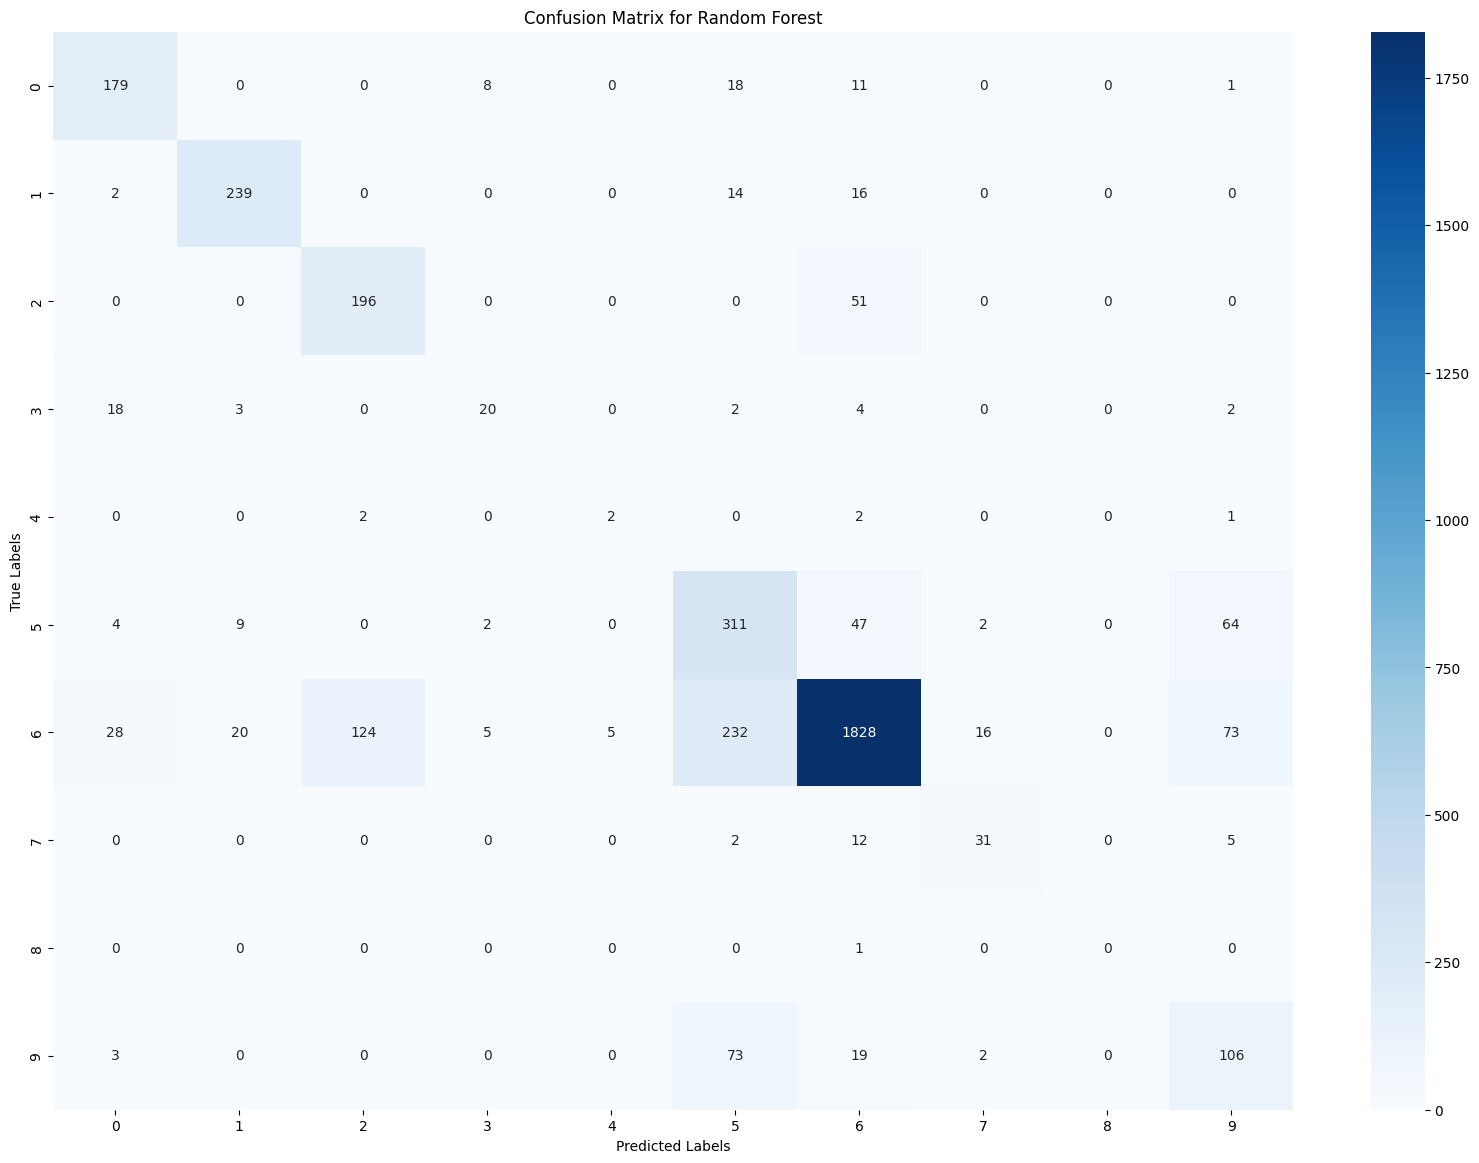

In [384]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(20, 14))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

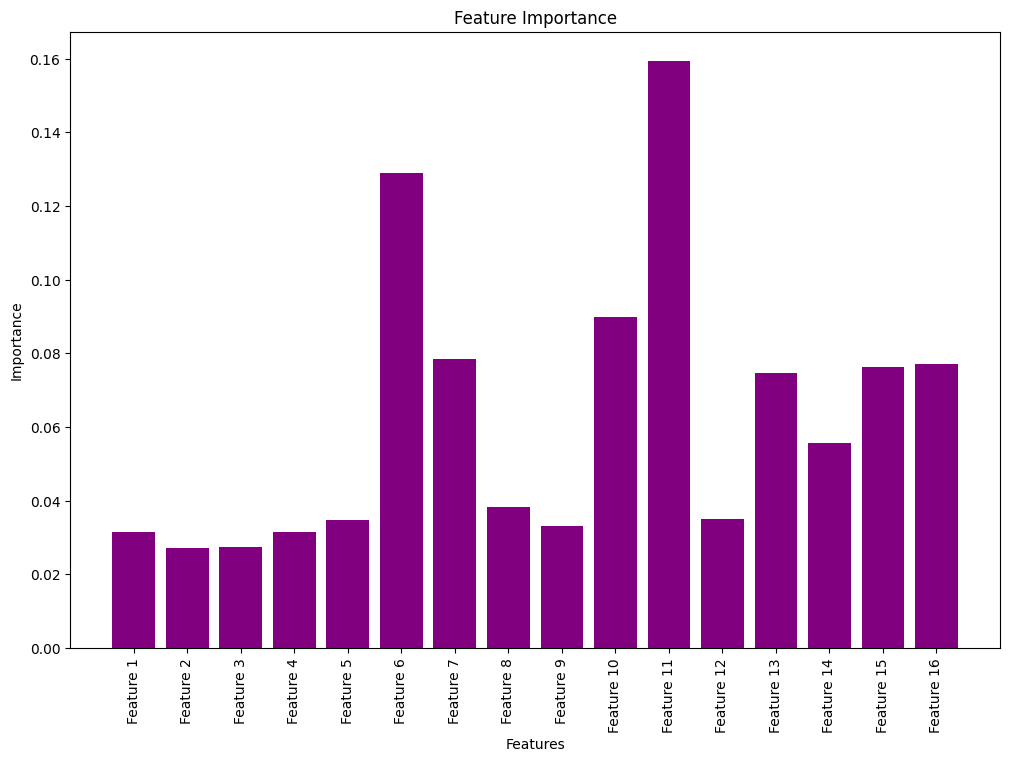

In [385]:
# Get feature importances from the model

feature_importance =rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importance)), feature_importance, align='center', color = 'purple')
plt.xticks(range(len(feature_importance)), ['Feature '+str(i) for i in range(1,X.shape[1]+1)], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


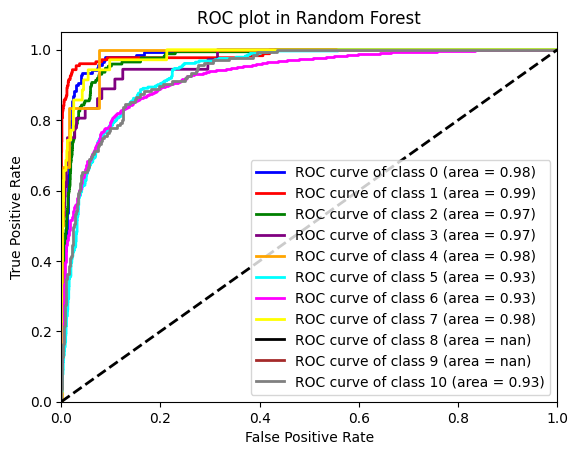

In [409]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels for multi-class ROC
y_bin = label_binarize(y, classes=np.arange(11))
n_classes = y_bin.shape[1]

# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(rf)
classifier.fit(X_train_bin, y_train_bin)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], classifier.predict_proba(X_test_bin)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'gray']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot in Random Forest')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.tree import export_graphviz
import pydot
from sklearn.tree import export_graphviz
import graphviz


# Extract an individual decision tree from the Random Forest
individual_tree = rf.estimators_[0]  # Get the first tree

# Export the decision tree as a DOT file
export_graphviz(individual_tree, out_file='individual_tree.dot',
                feature_names= list(entire_df.columns.drop('labels')),
                class_names= ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
                rounded=True, filled=True)

# Convert the DOT file to a PNG image using Graphviz
# (graph,) = pydot.graph_from_dot_file('individual_tree.dot')

# # Write the PNG image
# graph.write_png('individual_tree.png')

with open('individual_tree.dot') as f:
    dot_data = f.read()
    
# Draw graph
graph = graphviz.Source(dot_data)
graph.render("tree_visualization", format="png")  # Saves the tree visualization as a PNG image
graph

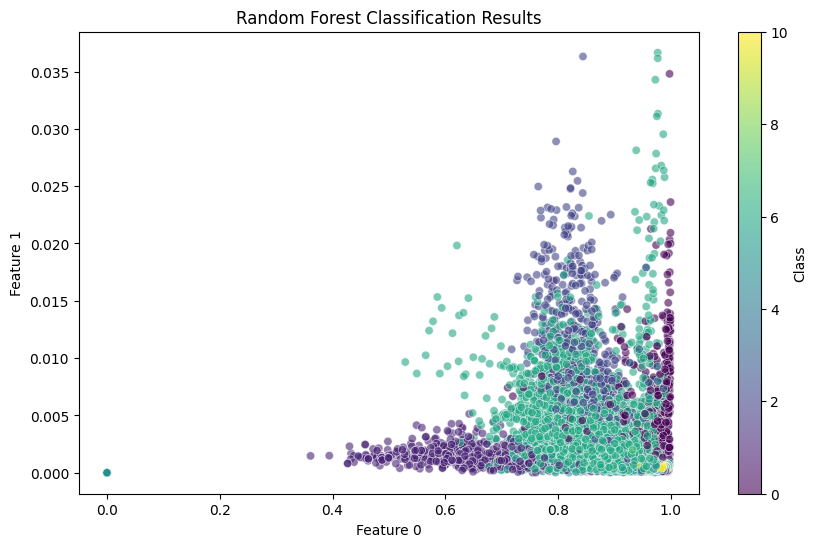

In [268]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

# Predict the labels on the entire dataset to visualize
y_pred = rf.predict(X)

# Select two features to visualize (for example, feature 0 and feature 1)
feature_x = X['Pitches']
feature_y = X['RMSs']

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(feature_x, feature_y, c=y_pred, cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Random Forest Classification Results')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.colorbar(scatter, label='Class')
plt.show()

In [270]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
# Calculate accuracy, precision, and recall
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'micro', 'macro', 'weighted', or 'binary' based on your need
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# For a detailed report showing precision, recall, f1-score for each class
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.79
Precision: 0.65
Recall: 0.42
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       217
           1       0.93      0.81      0.87       271
           2       0.75      0.57      0.65       247
           3       1.00      0.10      0.19        49
           4       0.00      0.00      0.00         7
           5       0.58      0.58      0.58       439
           6       0.83      0.93      0.88      2331
           7       1.00      0.10      0.18        50
           9       0.00      0.00      0.00         1
          10       0.60      0.41      0.49       203

    accuracy                           0.79      3815
   macro avg       0.65      0.42      0.46      3815
weighted avg       0.79      0.79      0.78      3815



/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

## Gradient Boosting Machine

Accuracy: 0.8238993710691824
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       138
           1       0.96      0.90      0.93       176
           2       0.76      0.68      0.72       172
           3       0.70      0.44      0.54        36
           4       0.00      0.00      0.00         6
           5       0.62      0.64      0.63       283
           6       0.88      0.93      0.90      1563
           7       0.76      0.37      0.50        35
          10       0.58      0.39      0.46       135

    accuracy                           0.82      2544
   macro avg       0.67      0.57      0.61      2544
weighted avg       0.82      0.82      0.82      2544

Accuracy: 0.82
Precision: 0.67
Recall: 0.57
F1-score: 0.61
Cohen's Kappa: 0.69
Matthews Correlation Coefficient: 0.69


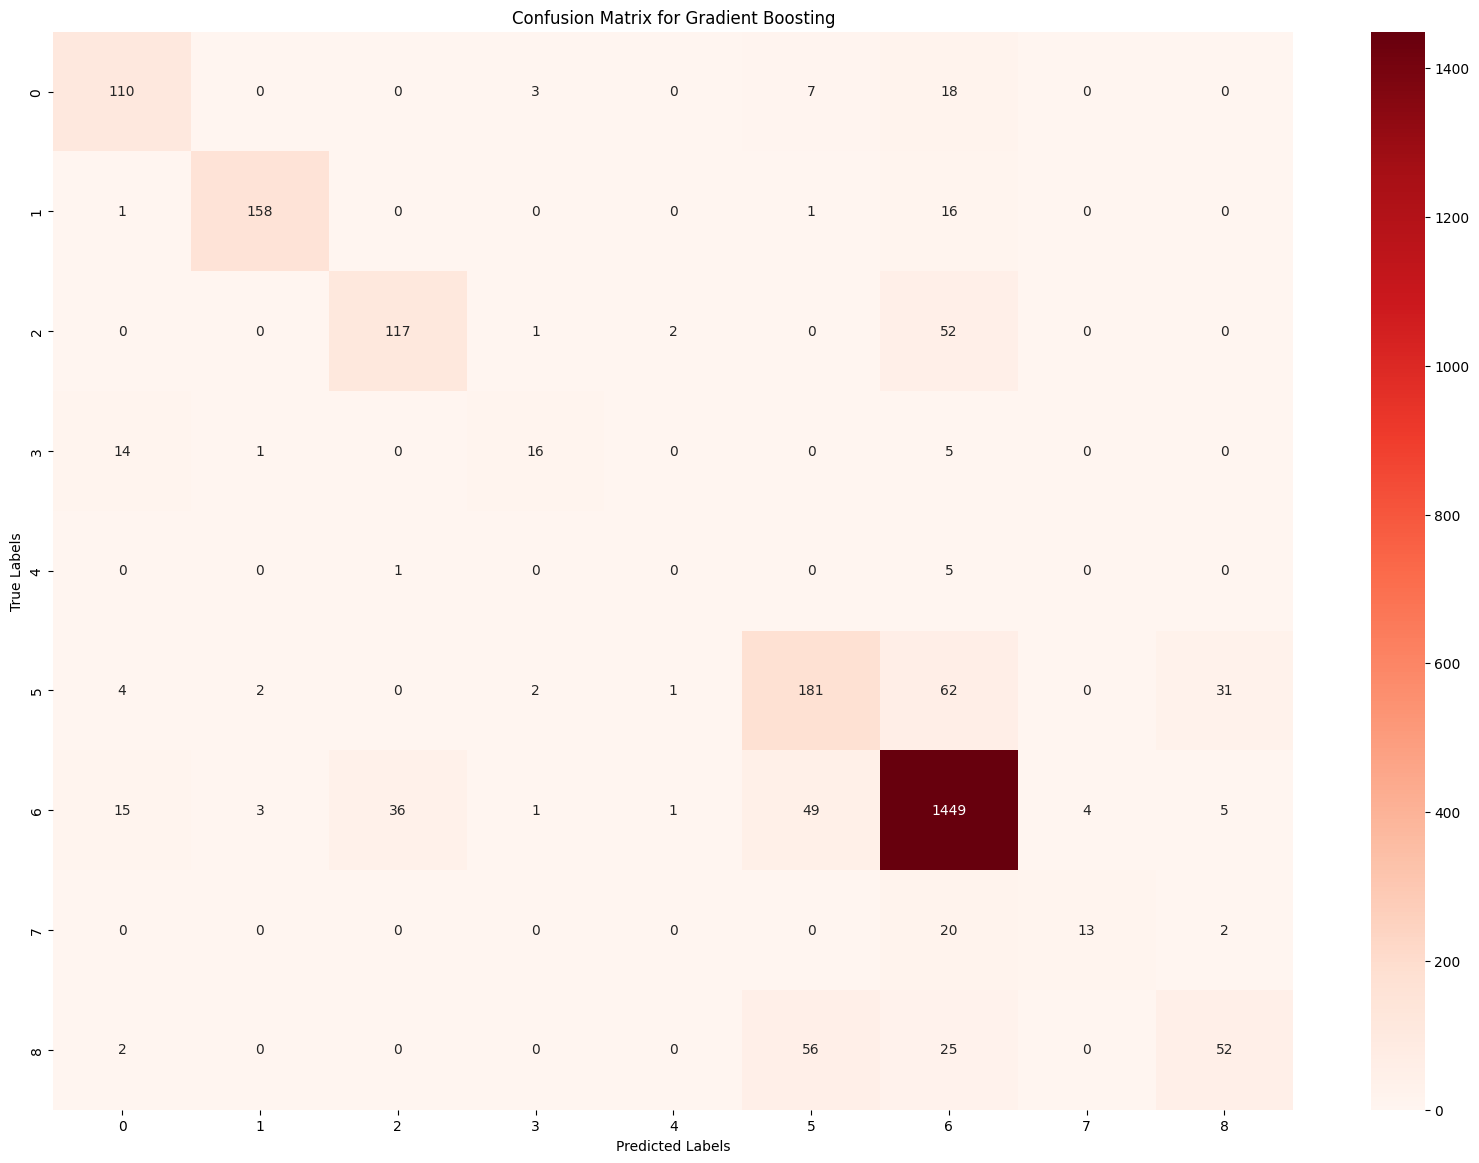

In [400]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbm_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.15, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)


y_pred = gbm_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)





Accuracy: 0.82
Precision: 0.67
Recall: 0.57
F1-score: 0.61
Cohen's Kappa: 0.69
Matthews Correlation Coefficient: 0.69


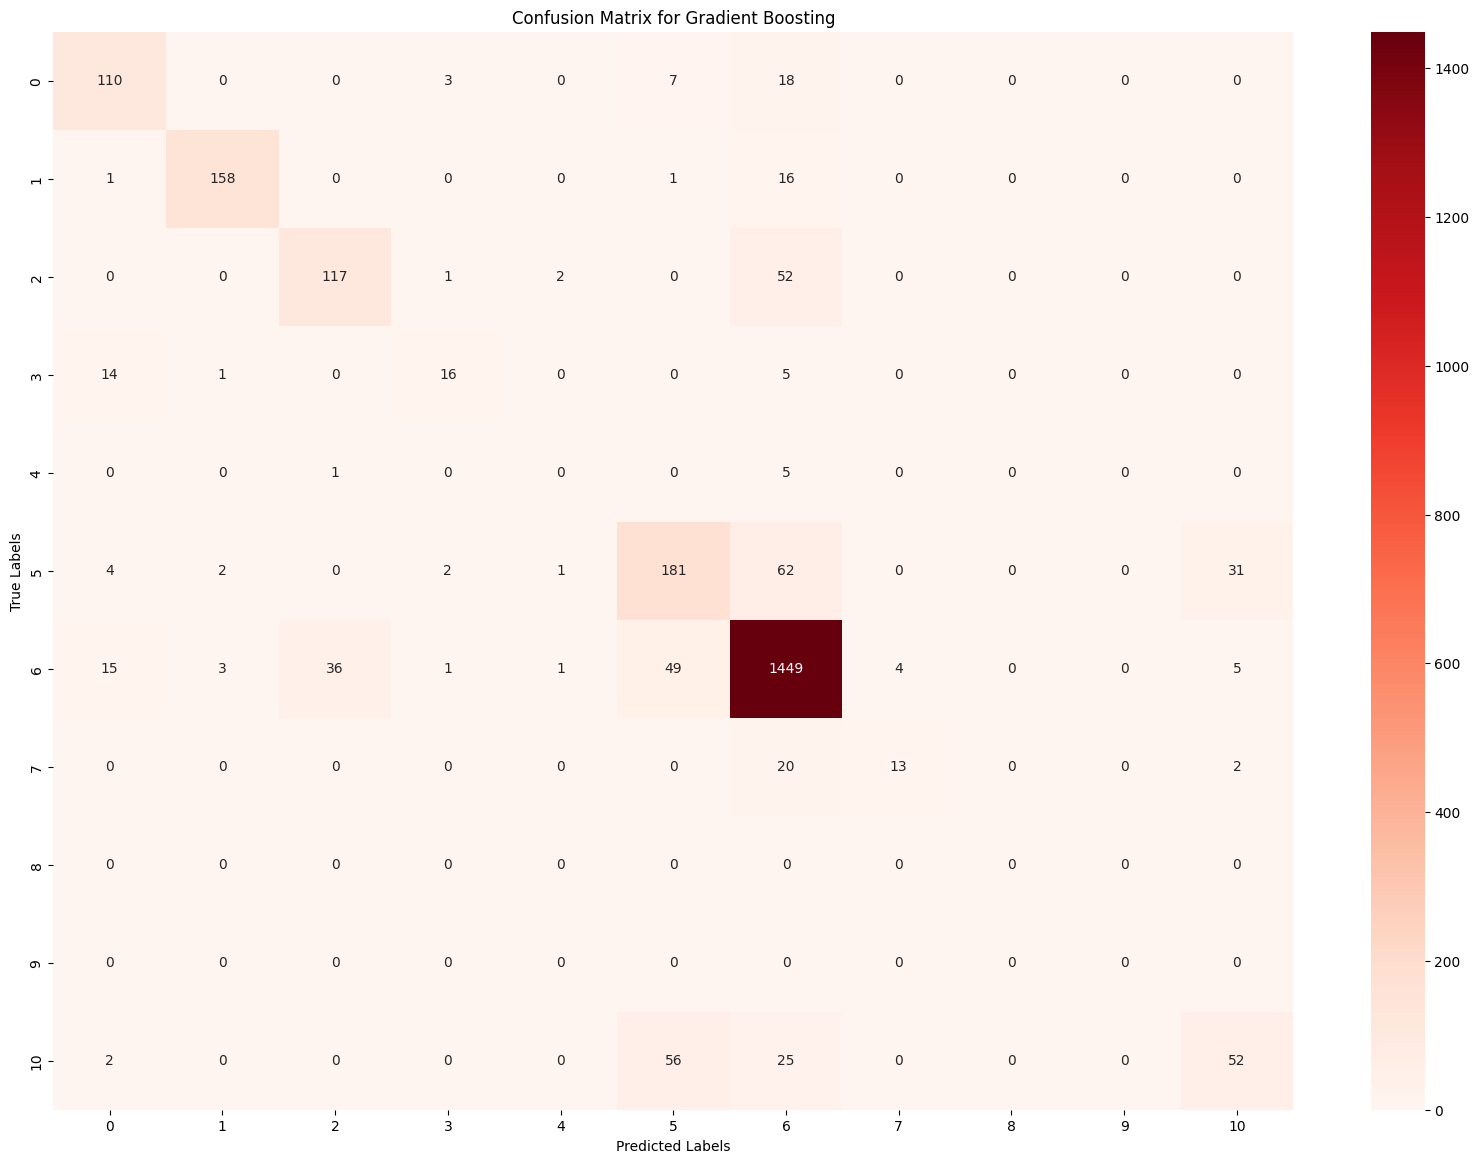

In [405]:
calls_label_dict = {'Ag':0,
                      'Be':1,
                      'DC':2,
                      'Di':3,
                      'LT':4,
                      'Ne':5,
                      'So':6,
                      'Te':7,
                      'Th':8,
                      'Tu':9,
                      'Wh':10}
  


cm_gbm = confusion_matrix(y_test, y_pred , labels= list(calls_label_dict.values()))

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Cohen\'s Kappa: {kappa:.2f}')
print(f'Matthews Correlation Coefficient: {mcc:.2f}')

# Plotting using seaborn
plt.figure(figsize=(20, 14))
sns.heatmap(cm_gbm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

In [392]:
cv_scores_gbm = cross_val_score(gbm_model, X, y, cv=5)
print(cv_scores_gbm)
print(np.mean(cv_scores_gbm))

/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[0.79166667 0.78411325 0.8029886  0.78843885 0.79748329]
0.7929381308166208


In [380]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

gbm_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5, random_state=42)
gbm_model.fit(X_train, y_train)


y_pred = gbm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8206983328090595
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76       172
           1       0.96      0.87      0.91       230
           2       0.77      0.62      0.68       211
           3       0.59      0.40      0.47        43
           4       0.00      0.00      0.00         6
           5       0.63      0.66      0.65       359
           6       0.87      0.93      0.90      1945
           7       0.70      0.35      0.47        40
           9       0.00      0.00      0.00         0
          10       0.60      0.40      0.48       173

    accuracy                           0.82      3179
   macro avg       0.59      0.50      0.53      3179
weighted avg       0.81      0.82      0.81      3179



/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [366]:
cv_scores_gbm = cross_val_score(gbm_model, X, y, cv=5)

/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [374]:
cv_scores

array([0.80856918, 0.79551711, 0.81006685, 0.79591034, 0.8159654 ])

In [406]:
np.mean([0.80856918, 0.79551711, 0.81006685, 0.79591034, 0.8159654 ])

0.805205776

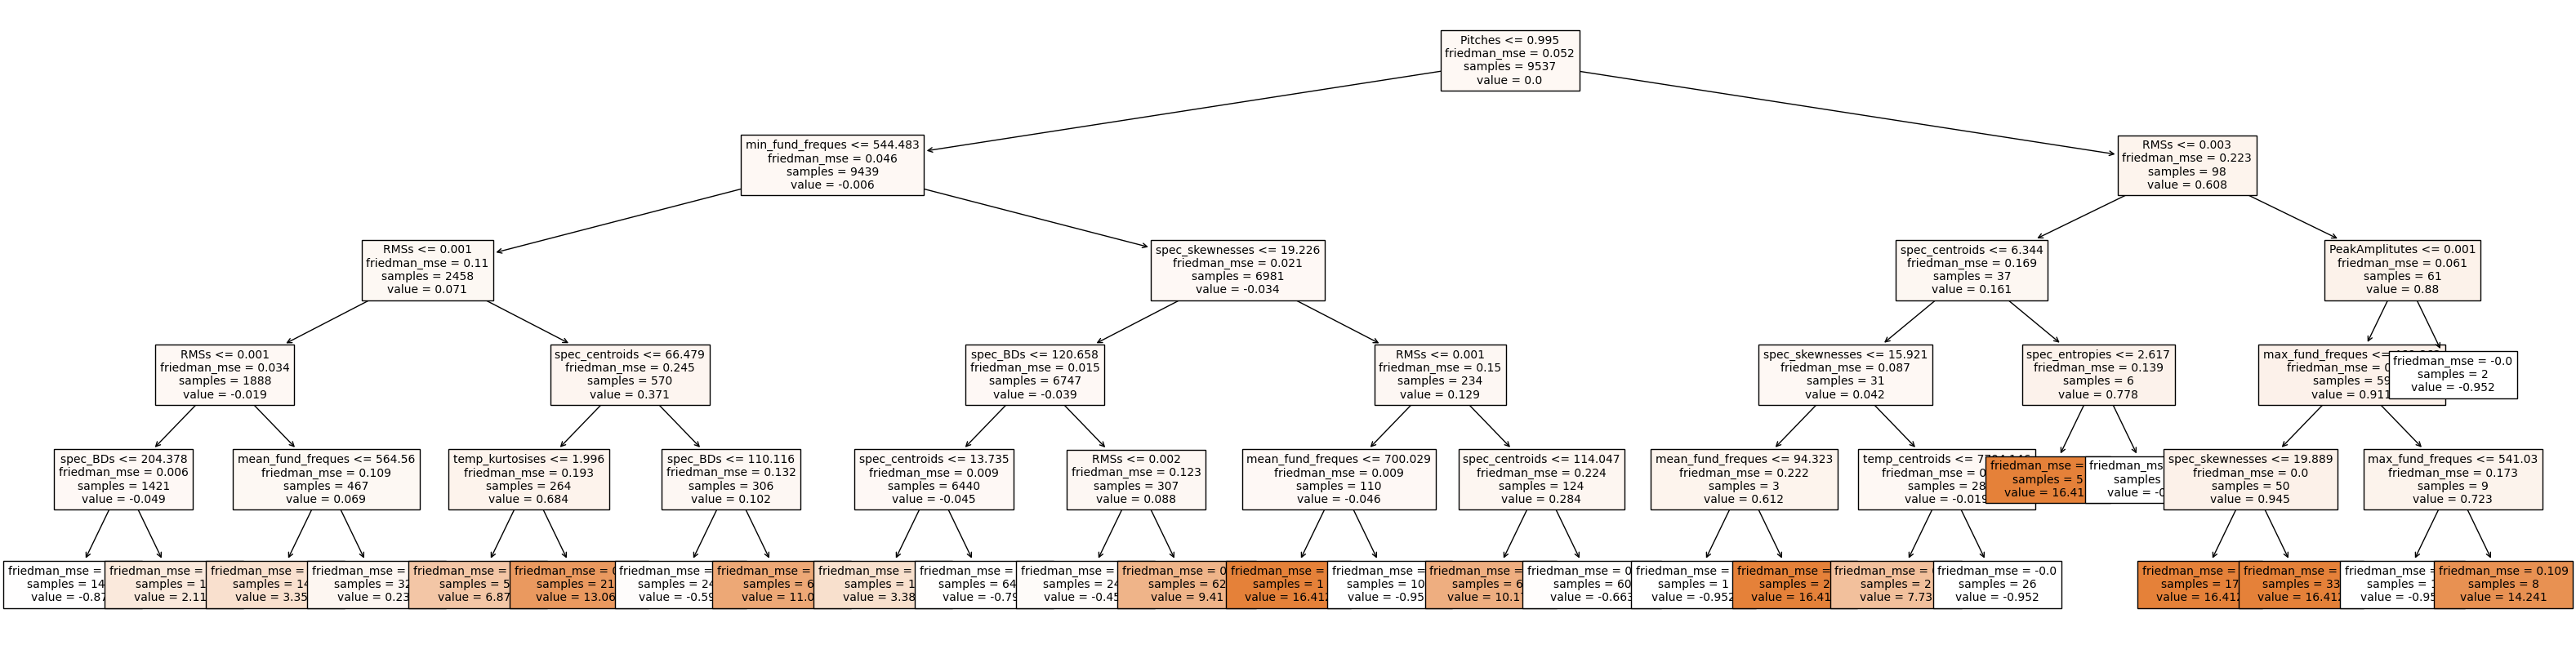

In [358]:
from sklearn.tree import plot_tree

# Visualize one of the trees from the ensemble
# tree_index = 0  # Change this index to view different trees
# plt.figure(figsize=(20,10))
# plot_tree(gbm_model.estimators_[tree_index, 0], filled=True, feature_names=X_train.columns, impurity=True)
# plt.show()

# Visualize one of the trees from the ensemble
tree_index = 0  # Change this index to view different trees
plt.figure(figsize=(40, 10))  # Adjust the size as necessary
plot_tree(gbm_model.estimators_[tree_index, 0], 
          filled=True, 
          feature_names=X_train.columns, 
          impurity=True,
          fontsize=10)  # Adjust fontsize for better readability if necessary

# Save the figure
plt.savefig("GBM.svg", format='svg')  # Save as SVG file
#plt.close()  # Close the plot to avoid displaying it inline if not needed

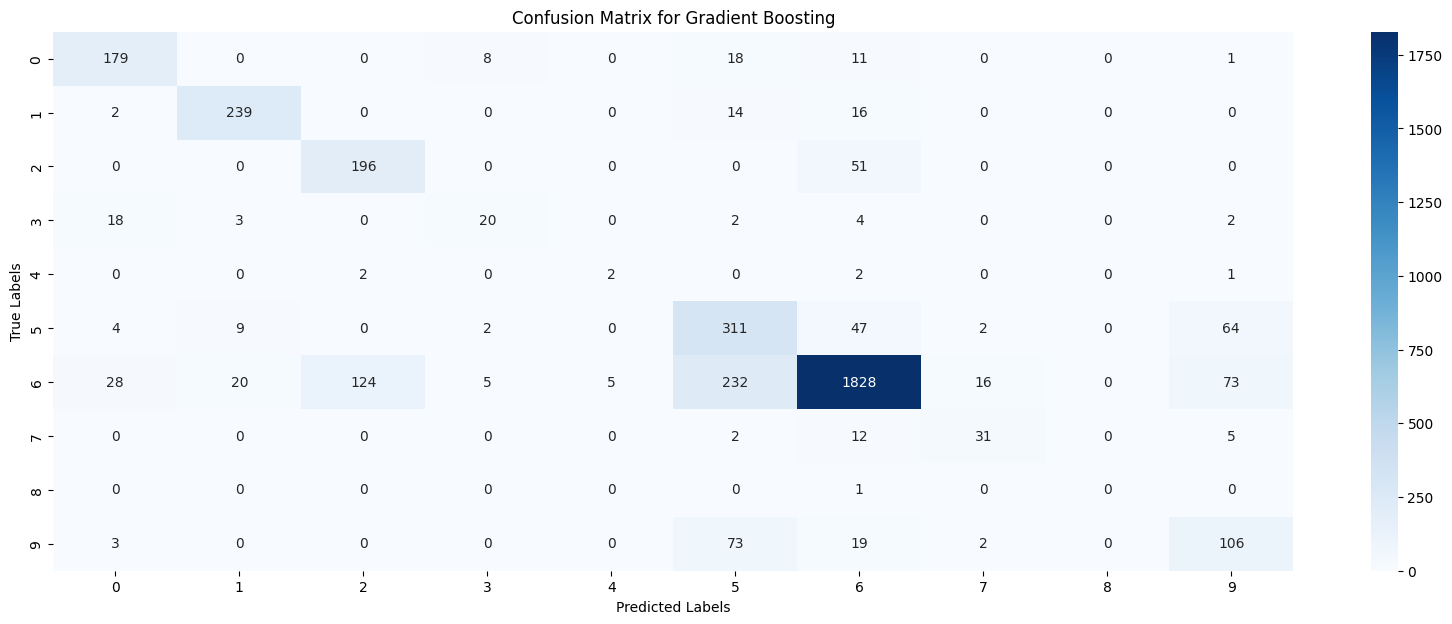

In [383]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(20, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()


/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


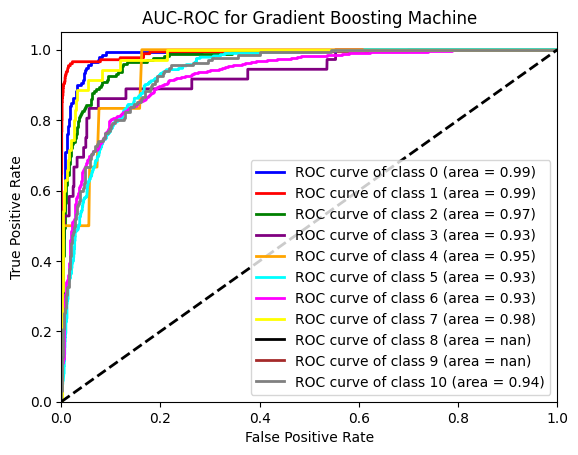

In [412]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels for multi-class ROC
y_bin = label_binarize(y, classes=np.arange(11))
n_classes = y_bin.shape[1]

# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(gbm_model)
classifier.fit(X_train_bin, y_train_bin)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], classifier.predict_proba(X_test_bin)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'gray']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC for Gradient Boosting Machine')
plt.legend(loc="lower right")
plt.show()



In [375]:

len(feature_importance)

19

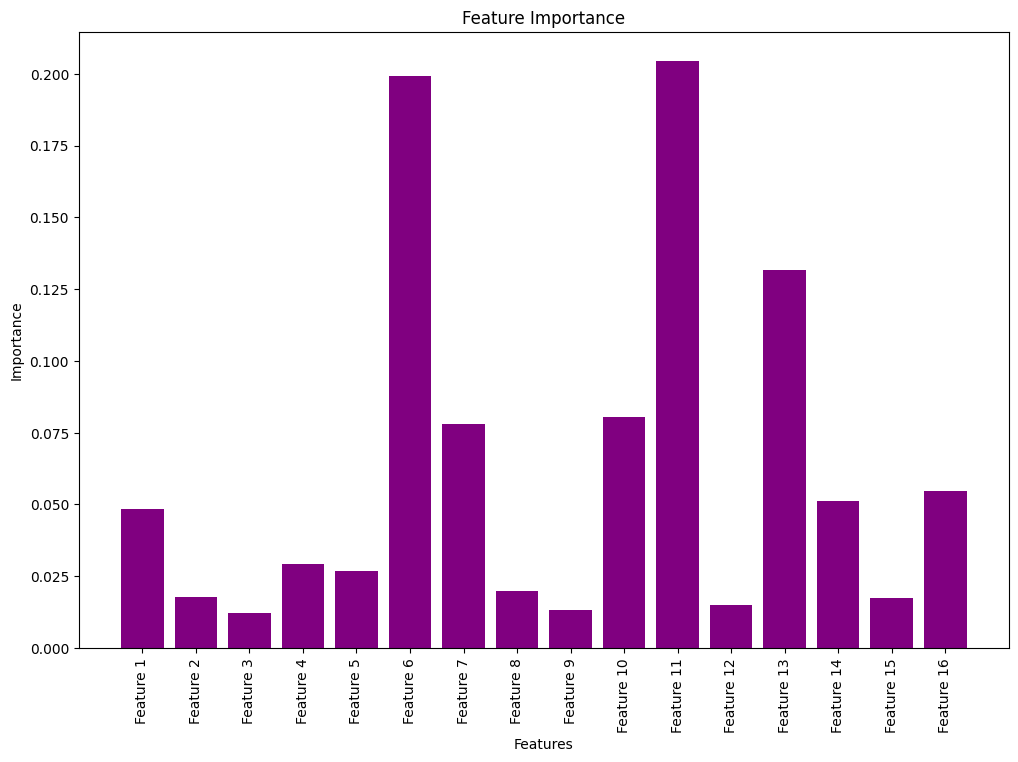

In [416]:
# Get feature importances from the model

feature_importance =gbm_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importance)), feature_importance, align='center', color = "purple")
plt.xticks(range(len(feature_importance)), ['Feature '+str(i) for i in range(1,X.shape[1]+1)], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


# second feature space
## Spectrogram

In [417]:
original_features[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [418]:
df


,0,1,2,3,4,5,6,7,8,9,...,15424,15425,15426,15427,15428,15429,15430,15431,15432,15433
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [420]:
type(original_features[0])

numpy.ndarray

In [460]:
import numpy as np
from scipy.signal import resample
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian
import librosa 

def resample_audio(y, original_sr = 44100, target_sr = 1017): 
    num_samples = len(y) # number of samples in the original data
    duration = num_samples / original_sr
    # Calculate the number of samples in the downsampled audio
    target_num_samples = int(duration * target_sr)

    # Resample the array
    downsampled_audio_data = resample(y, target_num_samples)
    return downsampled_audio_data


def spectrogram_calculations(y):
    #y = resample_audio(y)
    # sr_spectrogram = 1017
    # ## gaussian window
    # # Calculate the standard deviation for the Gaussian window in samples
    # std_dev = sr_spectrogram / (2 * np.pi * 52)  
    
    # window_length = int(3 / 1000 * sr_spectrogram)  # 3 ms windo
    
    # # Generate the Gaussian window
    # window = scipy.signal.windows.gaussian(window_length, std_dev)
    
    # hop_length = window_length // 2  # 50% overlap

    # #FRAMESIZE = 52
    # # Window and hop length (in samples)

    # # Compute the spectrogram
    # S = librosa.stft(y, n_fft=window_length, hop_length=hop_length, window=window)
    # return S
    
    
    FRAMESIZE = 1024
    HOP = 512
    S = librosa.stft(y, n_fft = FRAMESIZE, hop_length= HOP)
    return S


output = spectrogram_calculations(original_features[0])
Y_scale = np.abs(output) ** 2

In [461]:
Y_scale.shape

(513, 31)

In [462]:
type(Y_scale[0][0])

numpy.float64

In [465]:
FRAMESIZE = 1024
HOP = 512

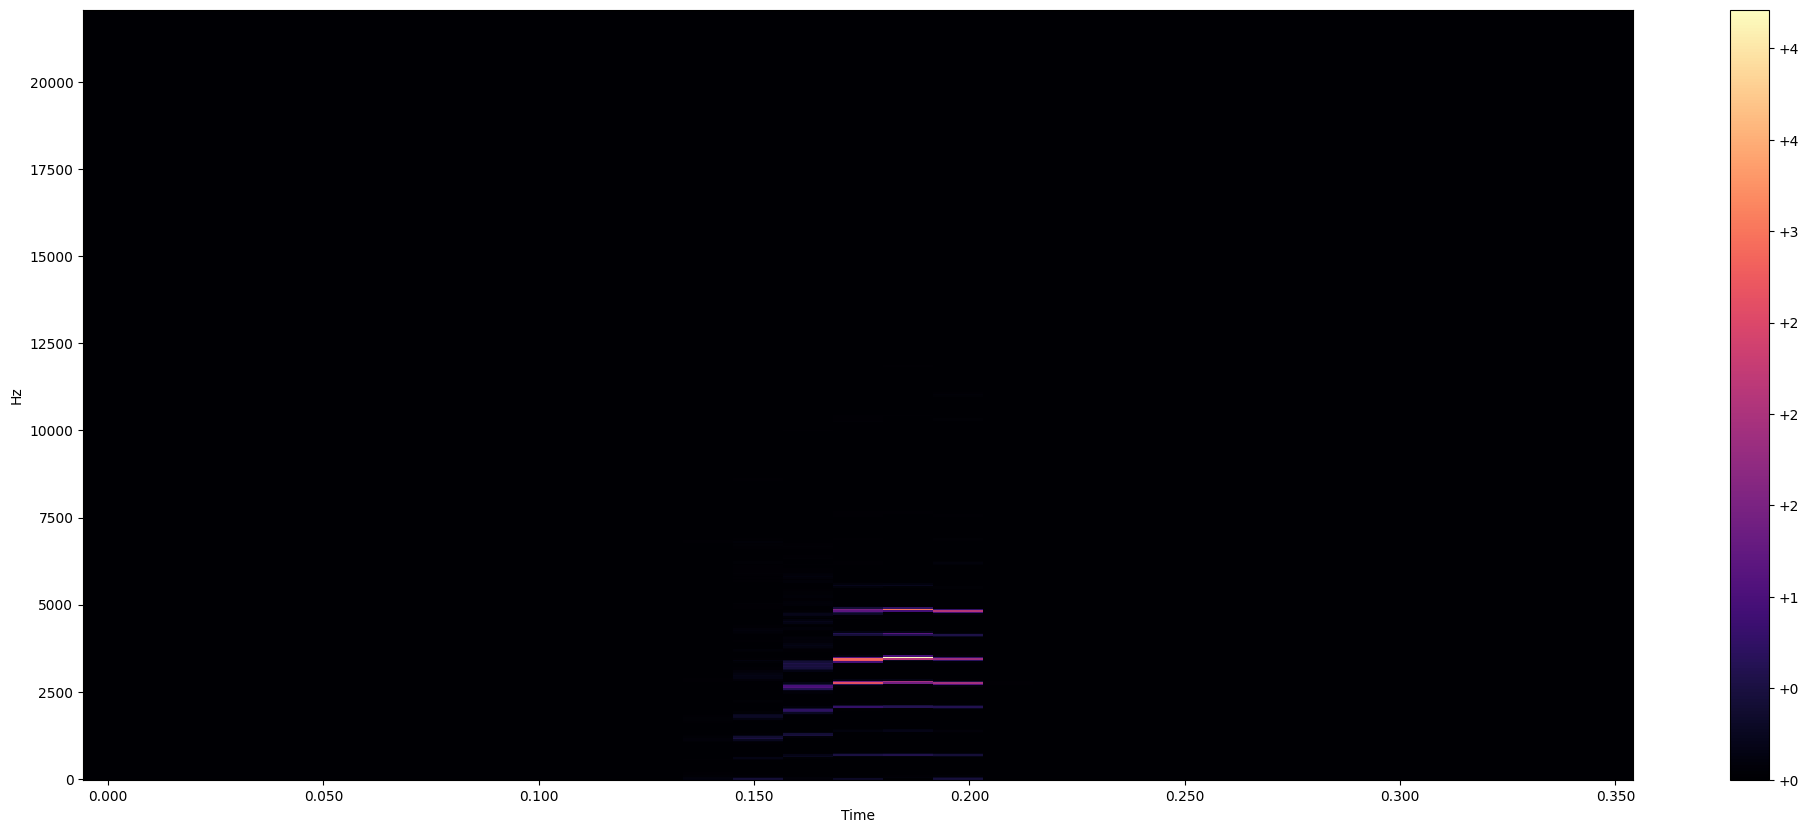

In [466]:
def plot_spectrogram(Y, sr, hop_length=HOP , y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
    
plot_spectrogram(Y_scale, sr=44100)

/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


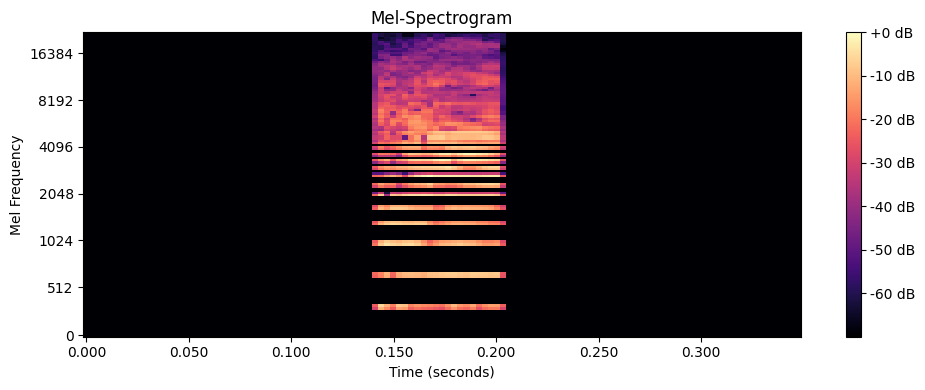

In [423]:
import librosa
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load an audio file
#audio_path = original_features[0]
#y, sr = librosa.load(audio_path, sr=None)
sr = 44100
y = original_features[0]
# Compute the spectrogram
# Compute the mel-spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=int(sr*0.003), hop_length=int(sr*0.003), n_mels=128)

# Convert to dB scale
S_dB = librosa.power_to_db(S, ref=np.max)

# Plotting the mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, hop_length=int(sr*0.003))
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()
# Flatten the spectrogram to create a single feature vector
#S_flat = S_dB.flatten()

# Assuming we have multiple such flattened spectrograms forming a dataset
# Let's say X is our dataset where each row is a flattened spectrogram
# Apply PCA
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)  # Standardizing the data is generally a good practice before PCA
# pca = PCA(n_components=50)  # Reduce to 50 components as an example
# X_pca = pca.fit_transform(X_scaled)

# # Train a classifier
# clf = LogisticRegression()
# clf.fit(X_pca, labels)  # 'labels' needs to be provided

# Now, clf can be used to predict the type of new vocalizations


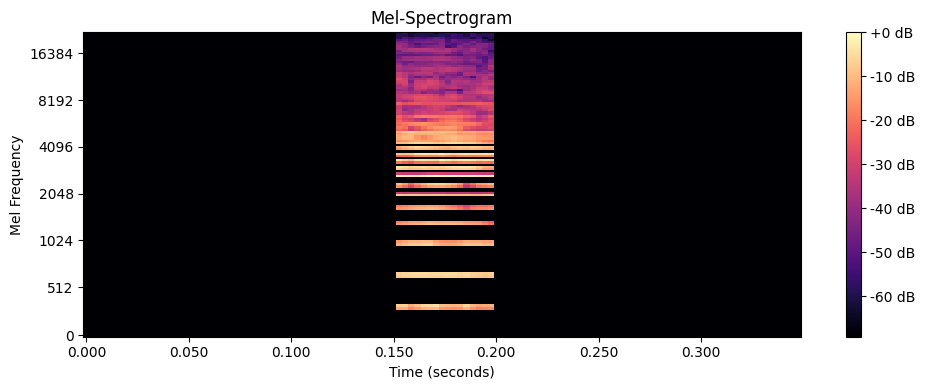

In [424]:
import librosa
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load an audio file
#audio_path = original_features[0]
#y, sr = librosa.load(audio_path, sr=None)
sr = 44100
y = original_features[1]
# Compute the spectrogram
# Compute the mel-spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=int(sr*0.003), hop_length=int(sr*0.003), n_mels=128)

# Convert to dB scale
S_dB = librosa.power_to_db(S, ref=np.max)

# Plotting the mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, hop_length=int(sr*0.003))
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()
# Flatten the spectrogram to create a single feature vector
#S_flat = S_dB.flatten()

# Assuming we have multiple such flattened spectrograms forming a dataset
# Let's say X is our dataset where each row is a flattened spectrogram
# Apply PCA
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)  # Standardizing the data is generally a good practice before PCA
# pca = PCA(n_components=50)  # Reduce to 50 components as an example
# X_pca = pca.fit_transform(X_scaled)

# # Train a classifier
# clf = LogisticRegression()
# clf.fit(X_pca, labels)  # 'labels' needs to be provided

# Now, clf can be used to predict the type of new vocalizations


In [ ]:
import matplotlib.pyplot as plt

# Plotting the mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, hop_length=int(sr*0.003))
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()